Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [3380]:
library(tidyverse)
library(ggplot2)
library(GGally)

In [3381]:
library(dslabs)

In [3382]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)


Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [3383]:
airbnb_data<-as.data.frame(select(airbnb, 'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'))
airbnb_data

City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
Madrid,Entire home/apt,,2,1.0,0,1,50,NA,2,15,96,40.40745,-3.7079955
Madrid,Entire home/apt,,4,1.0,1,2,50,NA,2,25,81,40.40832,-3.7050064
Madrid,Entire home/apt,,4,1.5,1,2,77,NA,1,0,89,40.41372,-3.7068231
Madrid,Entire home/apt,Embajadores,2,1.0,1,2,50,NA,1,20,93,40.41126,-3.6973054
Madrid,Entire home/apt,Embajadores,5,1.0,2,4,95,NA,4,0,97,40.41256,-3.7011554
Madrid,Entire home/apt,La Latina,4,1.0,1,2,69,NA,2,18,91,40.40791,-3.7050954
Madrid,Entire home/apt,,2,1.0,1,1,70,NA,1,0,100,40.40898,-3.6982515
Madrid,Private room,La Latina,2,1.5,1,1,30,NA,1,0,80,40.40836,-3.7040433
Madrid,Entire home/apt,Embajadores,4,1.0,1,2,57,NA,2,8,98,40.41162,-3.7032811


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [3384]:
df_madrid <-airbnb_data%>%filter( City=="Madrid" &  Room.Type=="Entire home/apt" &  Neighbourhood!="")
df_madrid <-select(df_madrid, -"City", -"Room.Type")
summary(df_madrid )

 Neighbourhood       Accommodates      Bathrooms        Bedrooms     
 Length:5601        Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Class :character   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 Mode  :character   Median : 4.000   Median :1.000   Median : 1.000  
                    Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
                    3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
                    Max.   :16.000   Max.   :6.500   Max.   :10.000  
                                     NA's   :14      NA's   :7       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 10.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 237.0   Median : 2.000  
 Mean   : 2.393   Mean   : 88.74   Mean   : 392.6   Mean   : 1.952  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [3385]:
df_madrid$Square.Meters<-(df_madrid$Square.Feet*0.092903 )
summary(df_madrid)


 Neighbourhood       Accommodates      Bathrooms        Bedrooms     
 Length:5601        Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Class :character   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 Mode  :character   Median : 4.000   Median :1.000   Median : 1.000  
                    Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
                    3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
                    Max.   :16.000   Max.   :6.500   Max.   :10.000  
                                     NA's   :14      NA's   :7       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 10.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 237.0   Median : 2.000  
 Mean   : 2.393   Mean   : 88.74   Mean   : 392.6   Mean   : 1.952  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [3386]:
paste("En Square.Meters hay " ,sum(is.na(df_madrid$Square.Meters) ),"NA")

paste("El porcentaje de NA en Square.Meters es ", mean(is.na(df_madrid$Square.Meters))*100)

#otra forma de ver los NA incluso la cantidad de apartamentos que tienen 0 metros
table(df_madrid$Square.Meters, useNA="always")


[1] "En Square.Meters hay  5254 NA"

[1] "El porcentaje de NA en Square.Meters es  93.8046777361185"


         0   2.043866   2.322575    2.78709   2.972896   3.251605    3.71612 
       128          1          2          1          1          2          6 
  3.994829   4.180635    4.64515   5.109665    5.57418    6.50321   6.596113 
         1          3          2          6          1          1          1 
  6.967725    7.43224   7.896755    8.36127     9.2903  10.033524  13.099323 
         2          1          3          2          1          2          1 
 18.023182  19.045115  19.974145  22.018011  24.990907  27.034773  27.963803 
         1          1          3          1          2          1          1 
 30.007669  31.958632  35.024431  36.046364  36.975394  37.997327   39.01926 
         8          2          5          1          2          2          1 
 40.041193  41.992156  44.036022  44.965052  49.981814  51.003747   52.02568 
        10          1          1         15         12          1          1 
 54.998576  56.020509  57.971472  60.015338   60.38695    65.03

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [3387]:
table((df_madrid$Square.Meters[which(df_madrid$Square.Meters==0)]))
paste("el porcentaje de apartamentos con 0 mts cuadrados es " , 128*100/5601)


  0 
128 

[1] "el porcentaje de apartamentos con 0 mts cuadrados es  2.28530619532226"

Reemplazar todos los 0m^2 por NA 

In [3388]:
df_madrid$Square.Meters[which(df_madrid$Square.Meters==0)]<-NA
table(df_madrid$Square.Meters, useNA="always")


  2.043866   2.322575    2.78709   2.972896   3.251605    3.71612   3.994829 
         1          2          1          1          2          6          1 
  4.180635    4.64515   5.109665    5.57418    6.50321   6.596113   6.967725 
         3          2          6          1          1          1          2 
   7.43224   7.896755    8.36127     9.2903  10.033524  13.099323  18.023182 
         1          3          2          1          2          1          1 
 19.045115  19.974145  22.018011  24.990907  27.034773  27.963803  30.007669 
         1          3          1          2          1          1          8 
 31.958632  35.024431  36.046364  36.975394  37.997327   39.01926  40.041193 
         2          5          1          2          2          1         10 
 41.992156  44.036022  44.965052  49.981814  51.003747   52.02568  54.998576 
         1          1         15         12          1          1          7 
 56.020509  57.971472  60.015338   60.38695    65.0321  68.0049

In [3389]:
table((df_madrid$Square.Meters[which(df_madrid$Square.Meters==0)]))

< table of extent 0 >

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

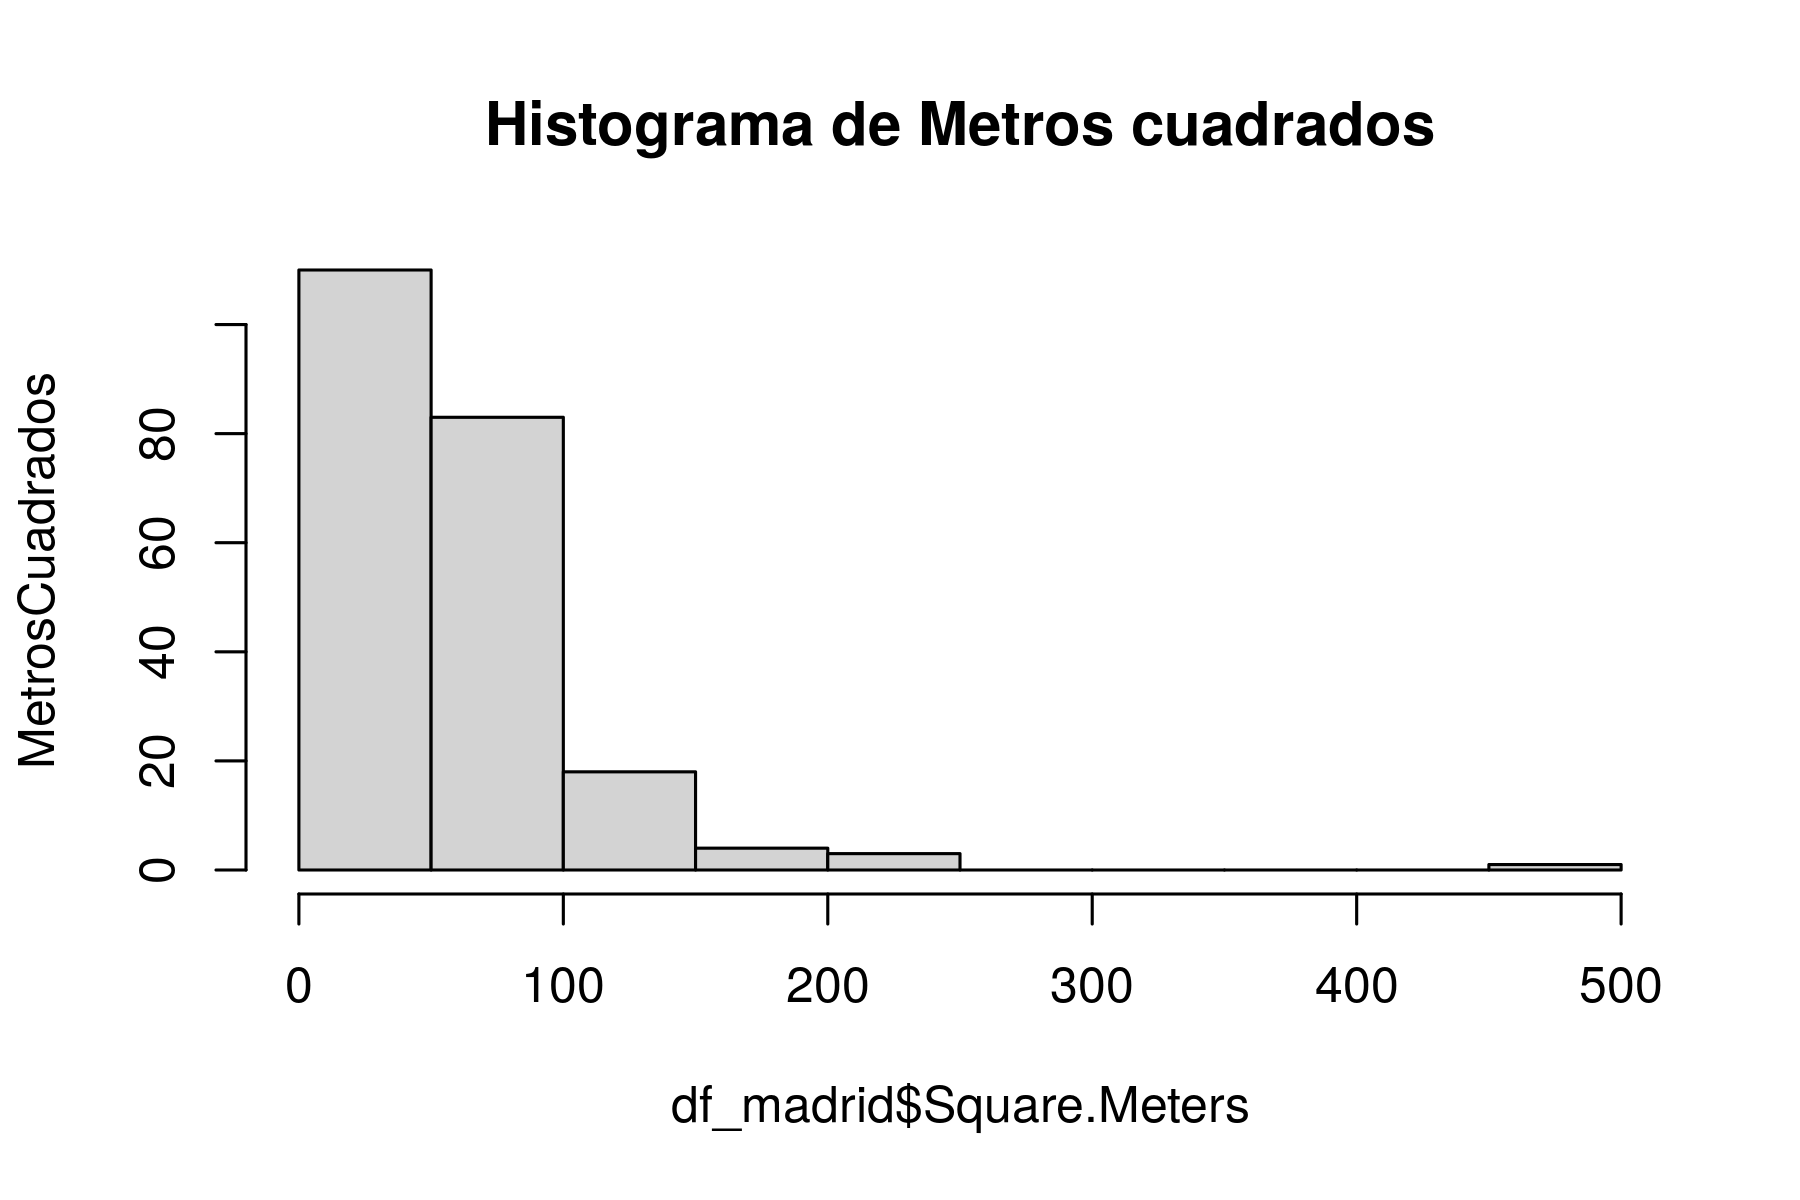

In [3390]:
hist(df_madrid$Square.Meters, main = "Histograma de Metros cuadrados", 
     ylab = "MetrosCuadrados")

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [3391]:
sum(table((df_madrid$Square.Meters[which(df_madrid$Square.Meters<20)])))

[1] 45

In [3392]:
table((df_madrid$Square.Meters[which(df_madrid$Square.Meters>300)]))
df_madrid$Square.Meters[which(df_madrid$Square.Meters>300)]<-NA


480.029801 
         1 

In [3393]:
df_madrid$Square.Meters[which(df_madrid$Square.Meters<20)]<-NA



Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [3394]:
paste("En Square.Meters hay " ,sum(is.na(df_madrid$Square.Meters) ),"NA")


[1] "En Square.Meters hay  5428 NA"

In [3395]:
library(dplyr)

In [3396]:
220*0.092903 

[1] 20.43866

In [3397]:
df_madrid


Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305,NA
Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155,NA
La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095,NA
Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281,NA
La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019,NA
La Latina,14,2,3,14,120,NA,2,18,92,40.40908,-3.704744,NA
La Latina,2,1,1,1,89,NA,1,10,98,40.41007,-3.710624,NA
Palacio,5,3,3,3,192,NA,2,12,80,40.42017,-3.712629,NA
La Latina,4,1,1,1,100,NA,2,12,NA,40.40990,-3.710948,NA


In [3398]:
df_madrid<-df_madrid%>%
  group_by(Neighbourhood) %>%
  mutate( ConMetros=sum(!is.na(Square.Meters)), num=n()) %>%arrange(ConMetros)

summary(df_madrid)

 Neighbourhood       Accommodates      Bathrooms        Bedrooms     
 Length:5601        Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Class :character   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 Mode  :character   Median : 4.000   Median :1.000   Median : 1.000  
                    Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
                    3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
                    Max.   :16.000   Max.   :6.500   Max.   :10.000  
                                     NA's   :14      NA's   :7       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 10.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 237.0   Median : 2.000  
 Mean   : 2.393   Mean   : 88.74   Mean   : 392.6   Mean   : 1.952  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

In [3399]:
df_madrid<-df_madrid%>%filter(ConMetros!="0")
df_madrid

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,ConMetros,num
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
El Tréntaiseis,4,2.0,2,3,140,NA,1,0,98,40.41188,-3.669571,NA,1,10
Jerónimos,2,1.0,1,1,65,NA,1,0,92,40.40813,-3.684410,NA,1,33
Jerónimos,4,1.0,1,4,130,NA,1,0,85,40.41321,-3.689552,NA,1,33
Jerónimos,5,2.0,2,2,100,NA,1,0,94,40.41463,-3.691347,NA,1,33
Fuente del Berro,6,2.0,3,6,80,NA,4,8,100,40.42585,-3.662694,NA,1,33
Almagro,4,1.0,0,1,59,NA,1,15,87,40.42981,-3.695291,NA,1,75
Almagro,3,1.0,1,2,105,NA,2,15,NA,40.43464,-3.690997,NA,1,75
Almagro,4,2.0,2,2,143,NA,2,15,NA,40.43414,-3.692237,NA,1,75
Rios Rosas,3,1.0,1,2,45,NA,1,0,91,40.44260,-3.697801,NA,1,37


In [3400]:
df_madrid<-df_madrid%>%select(-ConMetros,-num)


In [3401]:
df_madrid_NA<-df_madrid
df_madrid_NA

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
El Tréntaiseis,4,2.0,2,3,140,NA,1,0,98,40.41188,-3.669571,NA
Jerónimos,2,1.0,1,1,65,NA,1,0,92,40.40813,-3.684410,NA
Jerónimos,4,1.0,1,4,130,NA,1,0,85,40.41321,-3.689552,NA
Jerónimos,5,2.0,2,2,100,NA,1,0,94,40.41463,-3.691347,NA
Fuente del Berro,6,2.0,3,6,80,NA,4,8,100,40.42585,-3.662694,NA
Almagro,4,1.0,0,1,59,NA,1,15,87,40.42981,-3.695291,NA
Almagro,3,1.0,1,2,105,NA,2,15,NA,40.43464,-3.690997,NA
Almagro,4,2.0,2,2,143,NA,2,15,NA,40.43414,-3.692237,NA
Rios Rosas,3,1.0,1,2,45,NA,1,0,91,40.44260,-3.697801,NA


El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

In [3402]:
df_madrid=df_madrid[complete.cases(df_madrid$Square.Meters), ]
df_madrid

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Usera,2,1.0,1,1,40,538,1,0,78,40.38241,-3.703331,49.98181
Retiro,6,1.0,3,4,91,807,1,0,96,40.40668,-3.678839,74.97272
Fuente del Berro,6,2.0,3,4,180,1711,2,20,91,40.43020,-3.664836,158.95703
Rios Rosas,6,4.0,4,1,197,2153,1,12,88,40.44153,-3.694571,200.02016
Almagro,4,1.0,1,2,75,538,2,10,92,40.43825,-3.693876,49.98181
Adelfas,6,1.5,2,6,60,753,2,15,94,40.39912,-3.670071,69.95596
El Tréntaiseis,6,3.0,3,3,NA,1776,1,250,NA,40.40908,-3.673131,164.99573
Barajas,2,1.0,1,1,42,398,2,15,100,40.47606,-3.576178,36.97539
El Viso,3,1.0,1,1,55,431,1,0,87,40.44371,-3.683187,40.04119


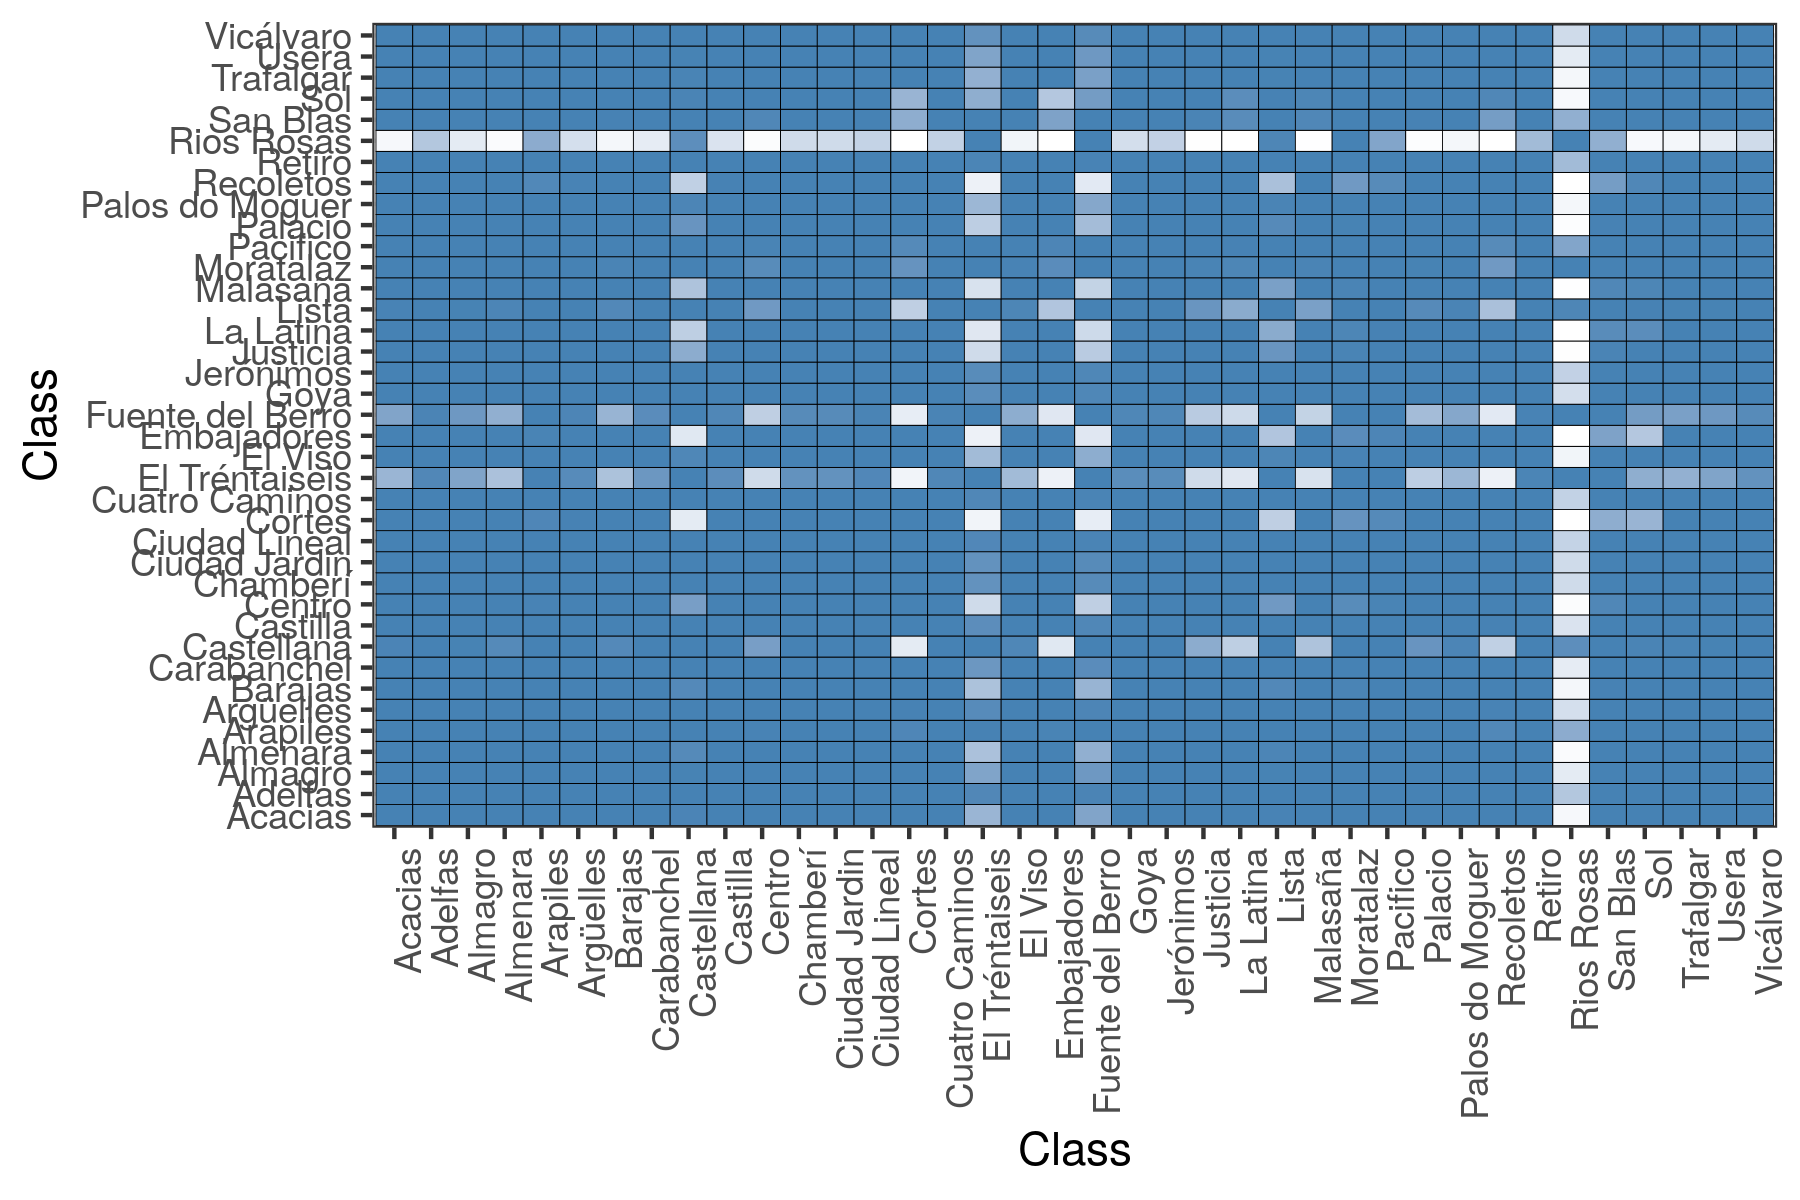

In [3403]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

In [3404]:
resm

,Acacias,Adelfas,Almagro,Almenara,Arapiles,Argüelles,Barajas,Carabanchel,Castellana,Castilla,⋯,Palacio,Palos do Moguer,Recoletos,Retiro,Rios Rosas,San Blas,Sol,Trafalgar,Usera,Vicálvaro
Acacias,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9789,1.0000,⋯,1.0000,1.0000,1.0000,1.0000,0.0546,1.0000,1.0000,1.0000,1.0000,1.0000
Adelfas,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,⋯,1.0000,1.0000,1.0000,1.0000,0.4353,1.0000,1.0000,1.0000,1.0000,1.0000
Almagro,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9948,1.0000,⋯,1.0000,1.0000,1.0000,1.0000,0.1549,1.0000,1.0000,1.0000,1.0000,1.0000
Almenara,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9332,1.0000,⋯,1.0000,1.0000,1.0000,1.0000,0.0305,0.9997,1.0000,1.0000,1.0000,1.0000
Arapiles,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9997,1.0000,1.0000,1.0000,⋯,1.0000,1.0000,0.9519,1.0000,0.6541,1.0000,1.0000,1.0000,1.0000,1.0000
Argüelles,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,⋯,1.0000,1.0000,0.9924,1.0000,0.2447,1.0000,1.0000,1.0000,1.0000,1.0000
Barajas,1.0000,1.0000,1.0000,1.0000,0.9997,1.0000,1.0000,1.0000,0.9372,1.0000,⋯,1.0000,1.0000,1.0000,1.0000,0.0649,0.9966,1.0000,1.0000,1.0000,1.0000
Carabanchel,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9997,1.0000,⋯,1.0000,1.0000,0.9994,1.0000,0.1450,1.0000,1.0000,1.0000,1.0000,1.0000
Castellana,0.9789,1.0000,0.9948,0.9332,1.0000,1.0000,0.9372,0.9997,1.0000,1.0000,⋯,0.8440,0.9753,0.3621,1.0000,0.8982,1.0000,0.9845,0.9870,0.9948,0.9997
Castilla,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,⋯,1.0000,1.0000,0.9959,1.0000,0.2140,1.0000,1.0000,1.0000,1.0000,1.0000


In [3405]:
library(dendextend)

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


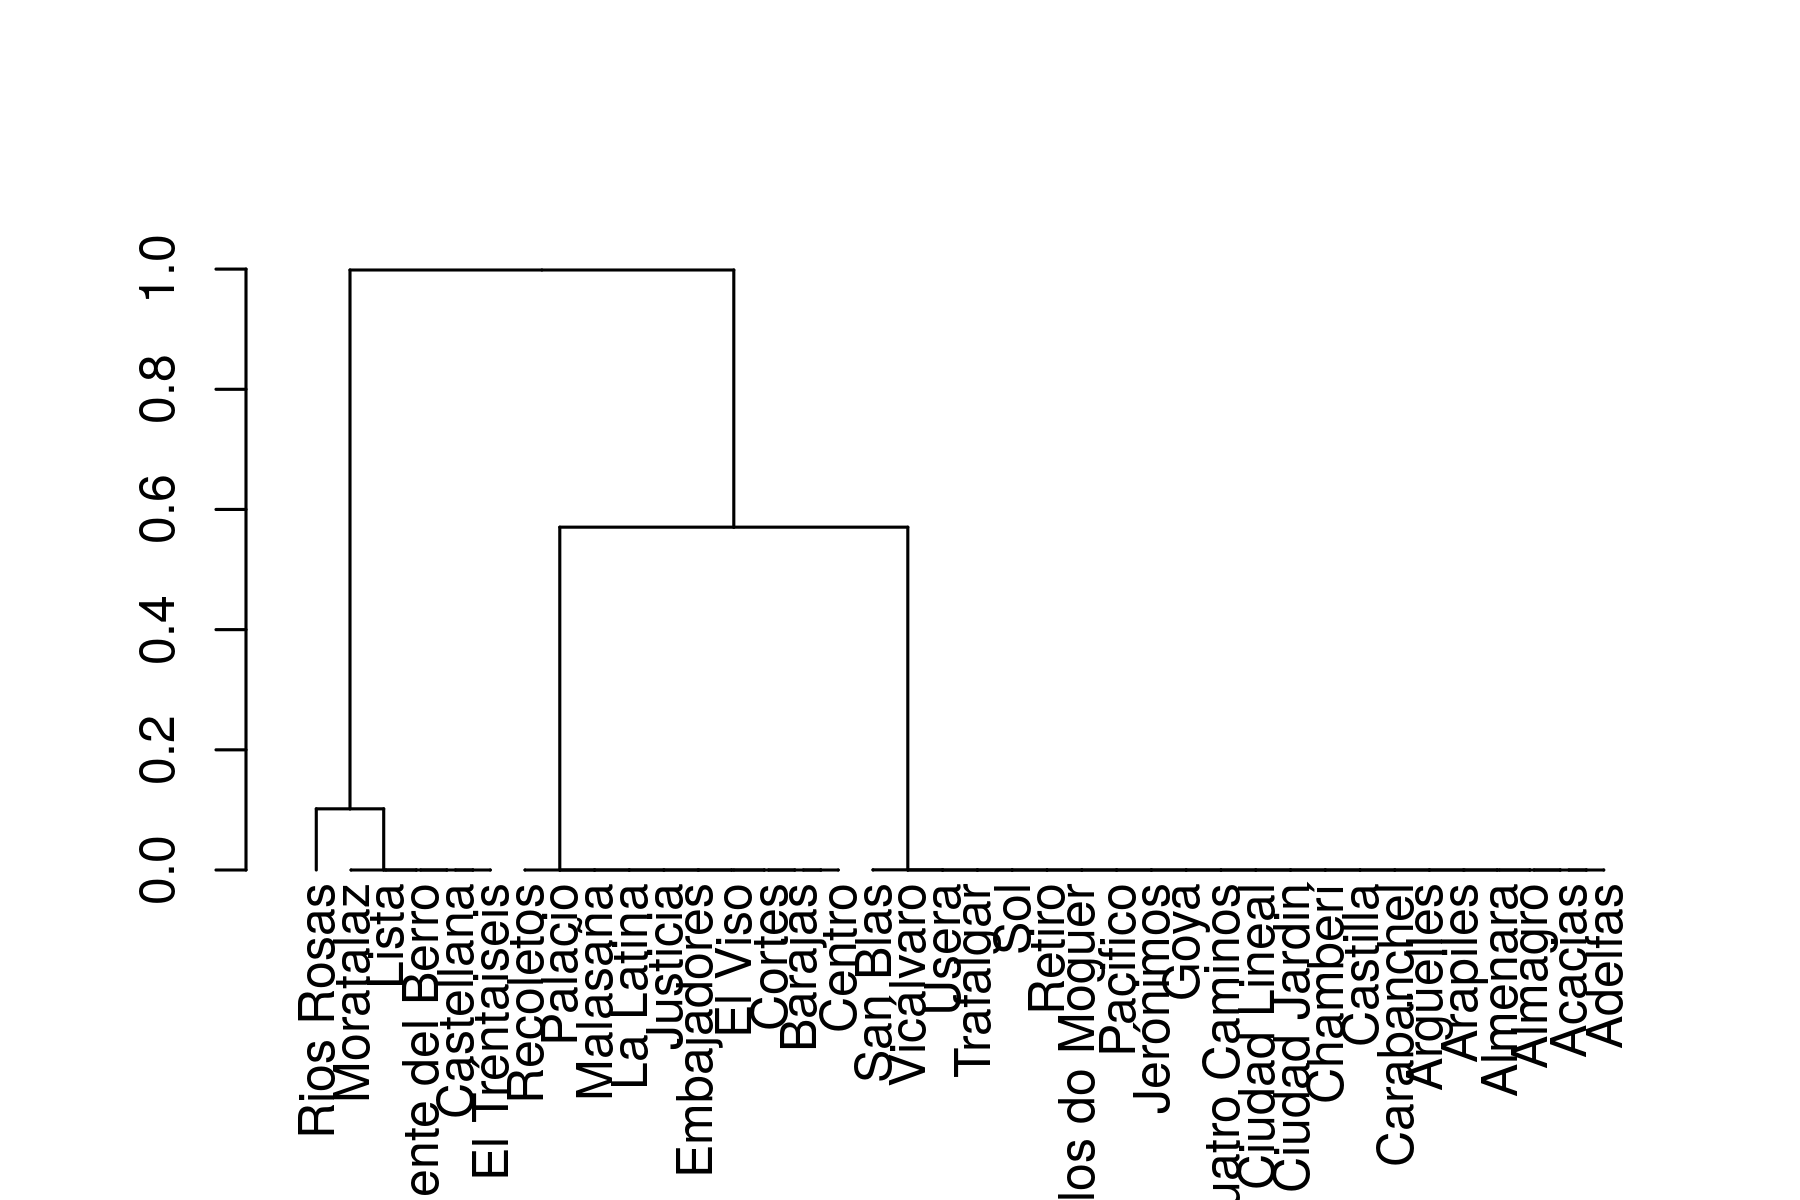

In [3406]:
d<-as.dist(1-resm)
hc<-hclust(d, method="complete")
hcd=as.dendrogram(hc)
plot(hcd)

In [3407]:
hcd

'dendrogram' with 2 branches and 38 members total, at height 0.9985 

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

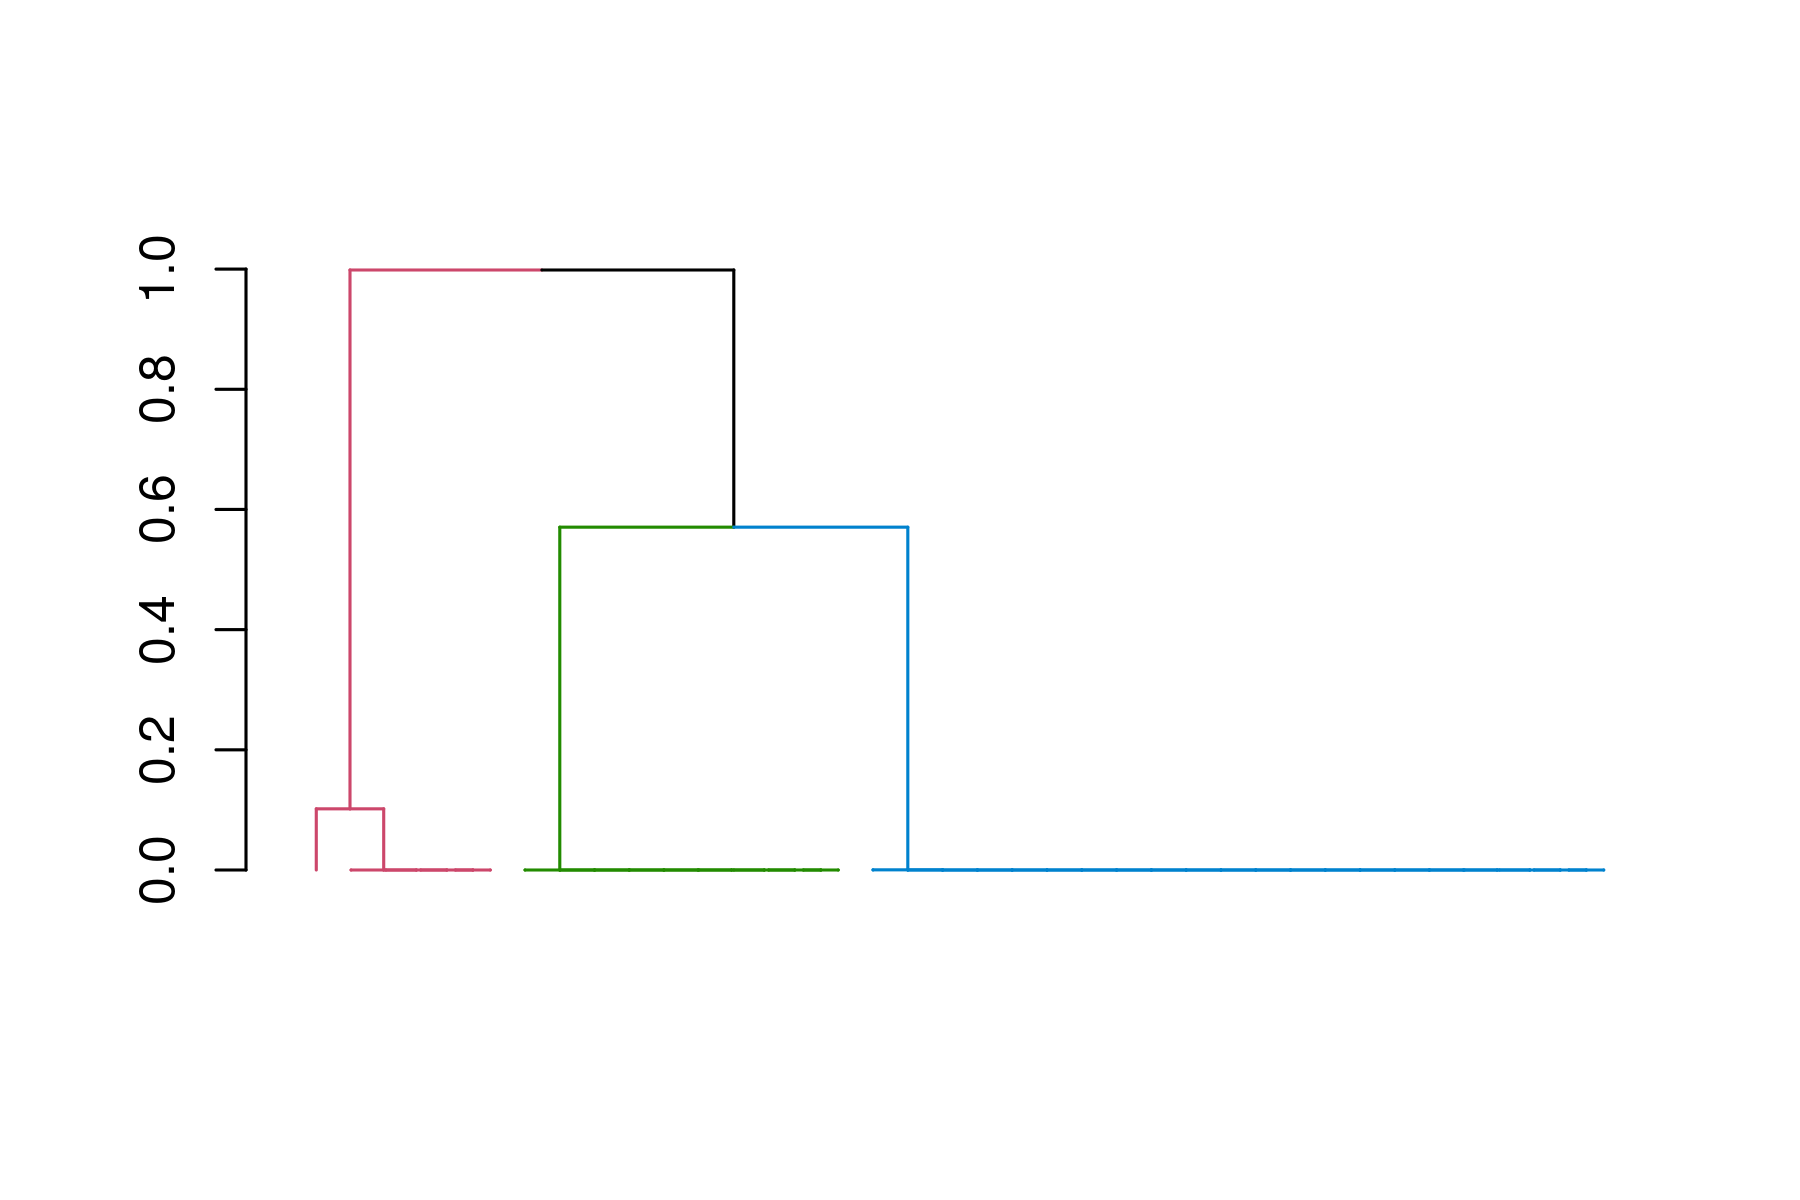

In [3408]:
plot(color_branches(hcd, k=3),leaflab="none")

el corte acosejable sería 0.6 y 2 clusters

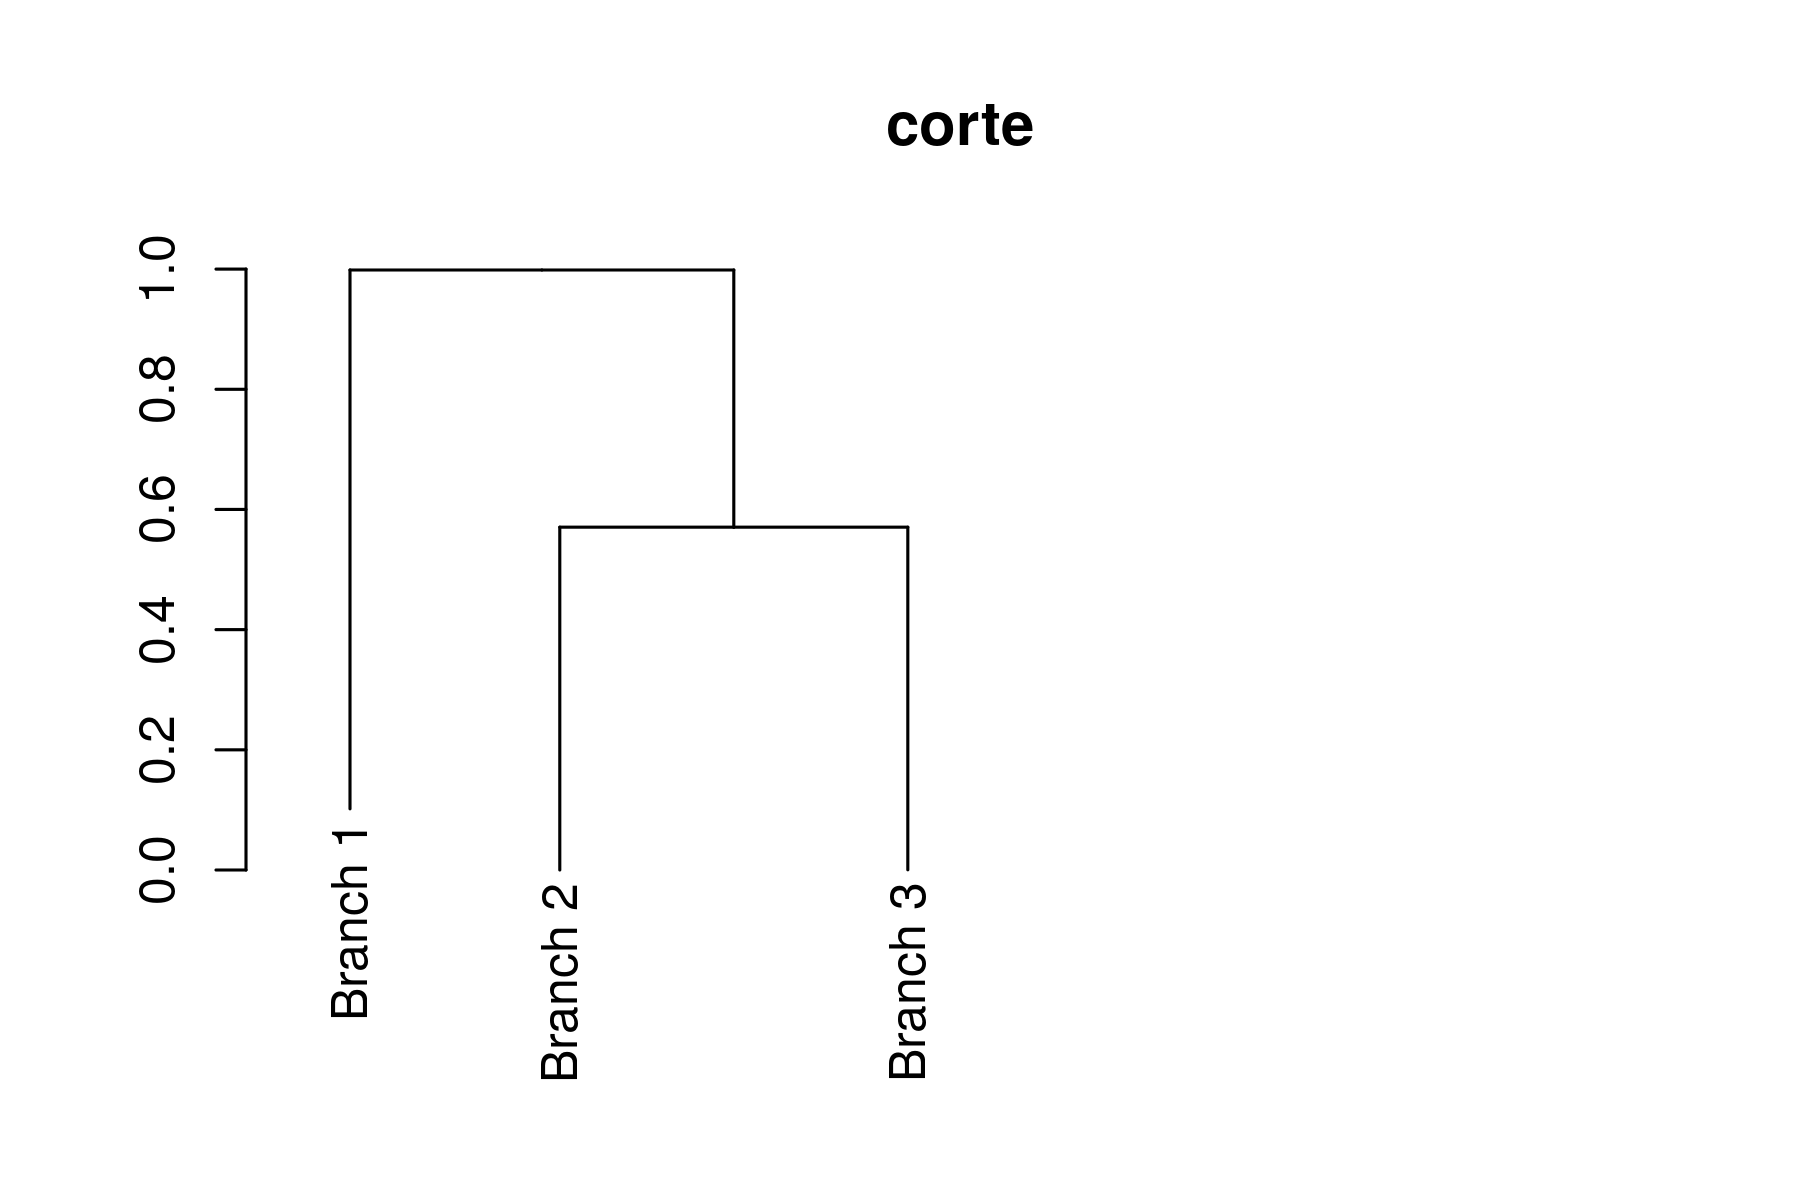

In [3409]:
plot(cut(hcd, h=0.4)$upper, main="corte", cex=1)

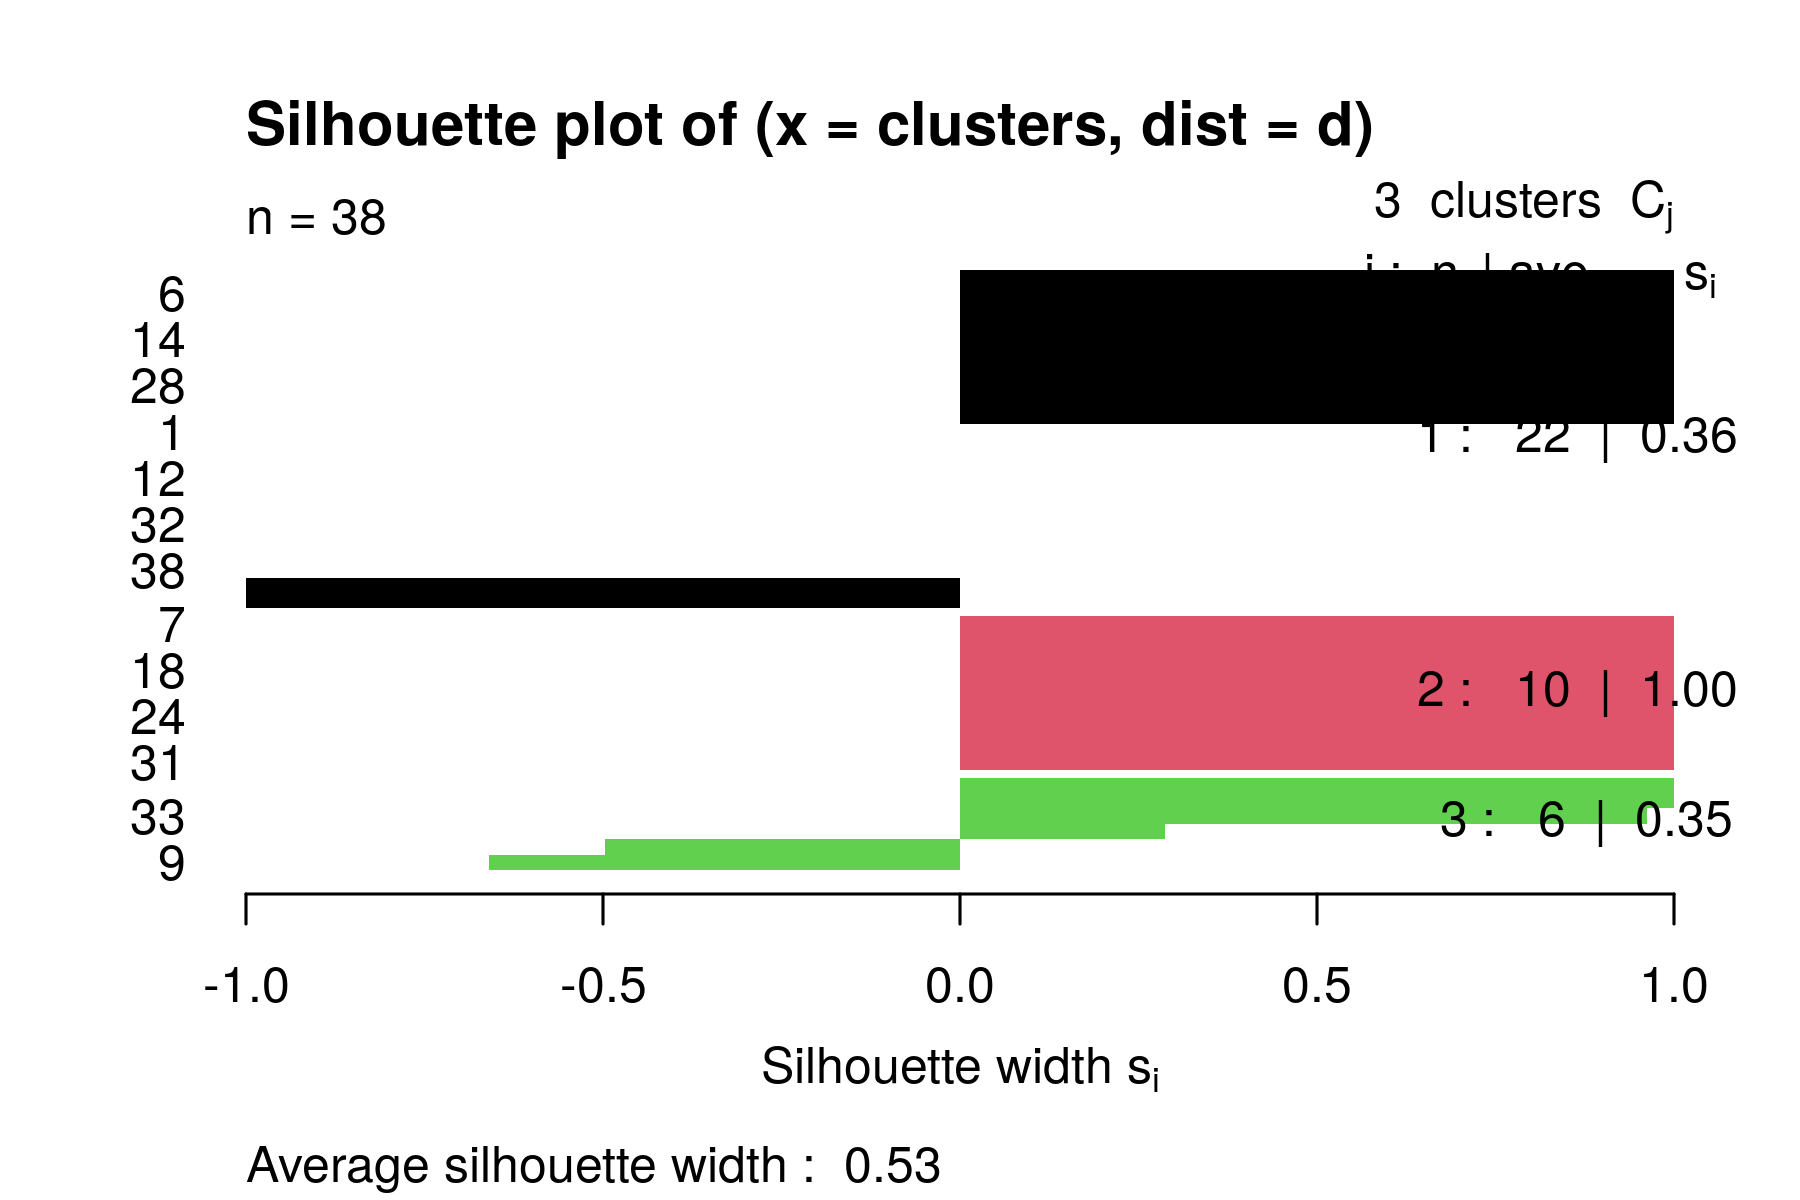

In [3410]:
library(cluster)
clusters<-cutree(hcd, k=3)
ss<-silhouette(clusters, d)
plot(ss,col=1:max(clusters),border=NA)

In [3411]:
cl<- cutree(hc,k=3)
table(cl)

cl
 1  2  3 
22 10  6 

In [3412]:
library(dbscan)

In [3413]:
hr_cl<-dbscan(resm,minPts=15, eps=0.5, borderPoints=TRUE)
hr_cl

DBSCAN clustering for 38 objects.
Parameters: eps = 0.5, minPts = 15
The clustering contains 1 cluster(s) and 11 noise points.

 0  1 
11 27 

Available fields: cluster, eps, minPts

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [3414]:
df_madrid$neighb_id <-as.factor(cl[df_madrid$Neighbourhood] )
df_madrid

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
Usera,2,1.0,1,1,40,538,1,0,78,40.38241,-3.703331,49.98181,1
Retiro,6,1.0,3,4,91,807,1,0,96,40.40668,-3.678839,74.97272,1
Fuente del Berro,6,2.0,3,4,180,1711,2,20,91,40.43020,-3.664836,158.95703,3
Rios Rosas,6,4.0,4,1,197,2153,1,12,88,40.44153,-3.694571,200.02016,3
Almagro,4,1.0,1,2,75,538,2,10,92,40.43825,-3.693876,49.98181,1
Adelfas,6,1.5,2,6,60,753,2,15,94,40.39912,-3.670071,69.95596,1
El Tréntaiseis,6,3.0,3,3,NA,1776,1,250,NA,40.40908,-3.673131,164.99573,3
Barajas,2,1.0,1,1,42,398,2,15,100,40.47606,-3.576178,36.97539,2
El Viso,3,1.0,1,1,55,431,1,0,87,40.44371,-3.683187,40.04119,2


Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removing 1 row that contained a missing value”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removing 1 row that contained a missing value”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 6 rows containing missing values”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing non-finite values (stat_density).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 3 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, n

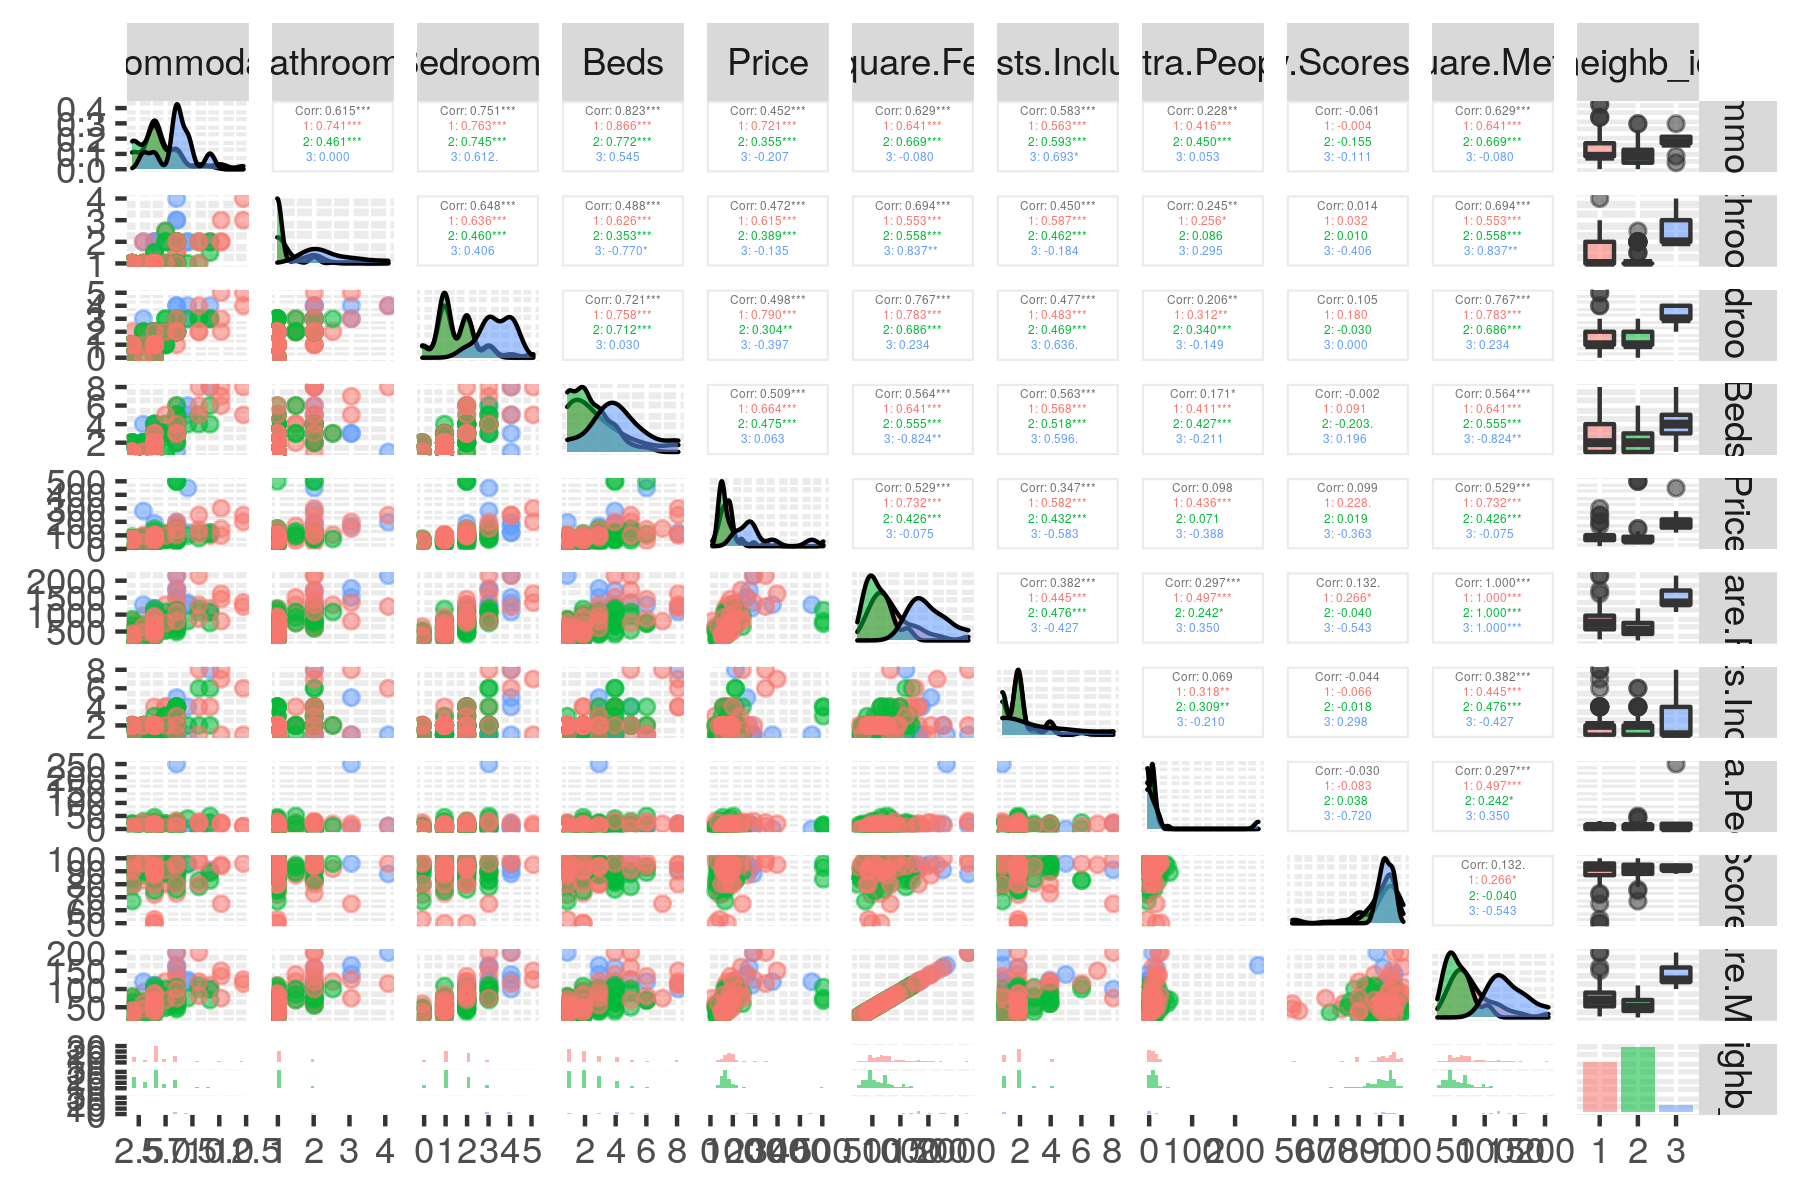

In [3415]:
ggpairs(df_madrid%>% ungroup()%>%select(-"Neighbourhood", -"Latitude",-"Longitude"), aes( alpha = 0.4, color=df_madrid$neighb_id),
        upper = list(continuous = wrap("cor", size = 1.0)))


In [3417]:
table(df_madrid$neighb_id)


 1  2  3 
71 93  9 

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [3418]:
set.seed(30)
idx<-sample(1:nrow(df_madrid), nrow(df_madrid)*0.7)
df_madrid_train<-df_madrid[idx,]
df_madrid_test<-df_madrid[-idx,]


In [3419]:
lm_model<-lm(df_madrid_train, formula=Square.Meters~Bathrooms+Bedrooms:neighb_id+log(Price))
summary(lm_model)


Call:
lm(formula = Square.Meters ~ Bathrooms + Bedrooms:neighb_id + 
    log(Price), data = df_madrid_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.555 -10.626  -1.268   9.731  76.186 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -35.910     16.661  -2.155  0.03326 *  
Bathrooms              9.810      4.087   2.400  0.01801 *  
log(Price)            14.562      4.253   3.424  0.00086 ***
Bedrooms:neighb_id1   21.015      2.628   7.996 1.22e-12 ***
Bedrooms:neighb_id2   12.323      2.786   4.424 2.25e-05 ***
Bedrooms:neighb_id3   19.371      3.311   5.851 4.85e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.38 on 113 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:   0.73,	Adjusted R-squared:  0.718 
F-statistic:  61.1 on 5 and 113 DF,  p-value: < 2.2e-16


In [3348]:
lm_model$coefficient

(Intercept)           Bathrooms          log(Price) Bedrooms:neighb_id1 
         -35.910351            9.809624           14.561522           21.015484 
Bedrooms:neighb_id2 Bedrooms:neighb_id3 
          12.322848           19.371471

,cooks.distance(lm_model)
,<dbl>
1,3.162086e-04
2,3.589527e-04
3,1.097439e-03
4,7.854033e-04
5,3.691880e-03
6,6.698627e-02
7,4.510134e-03
8,3.546691e-03
9,1.250156e-02


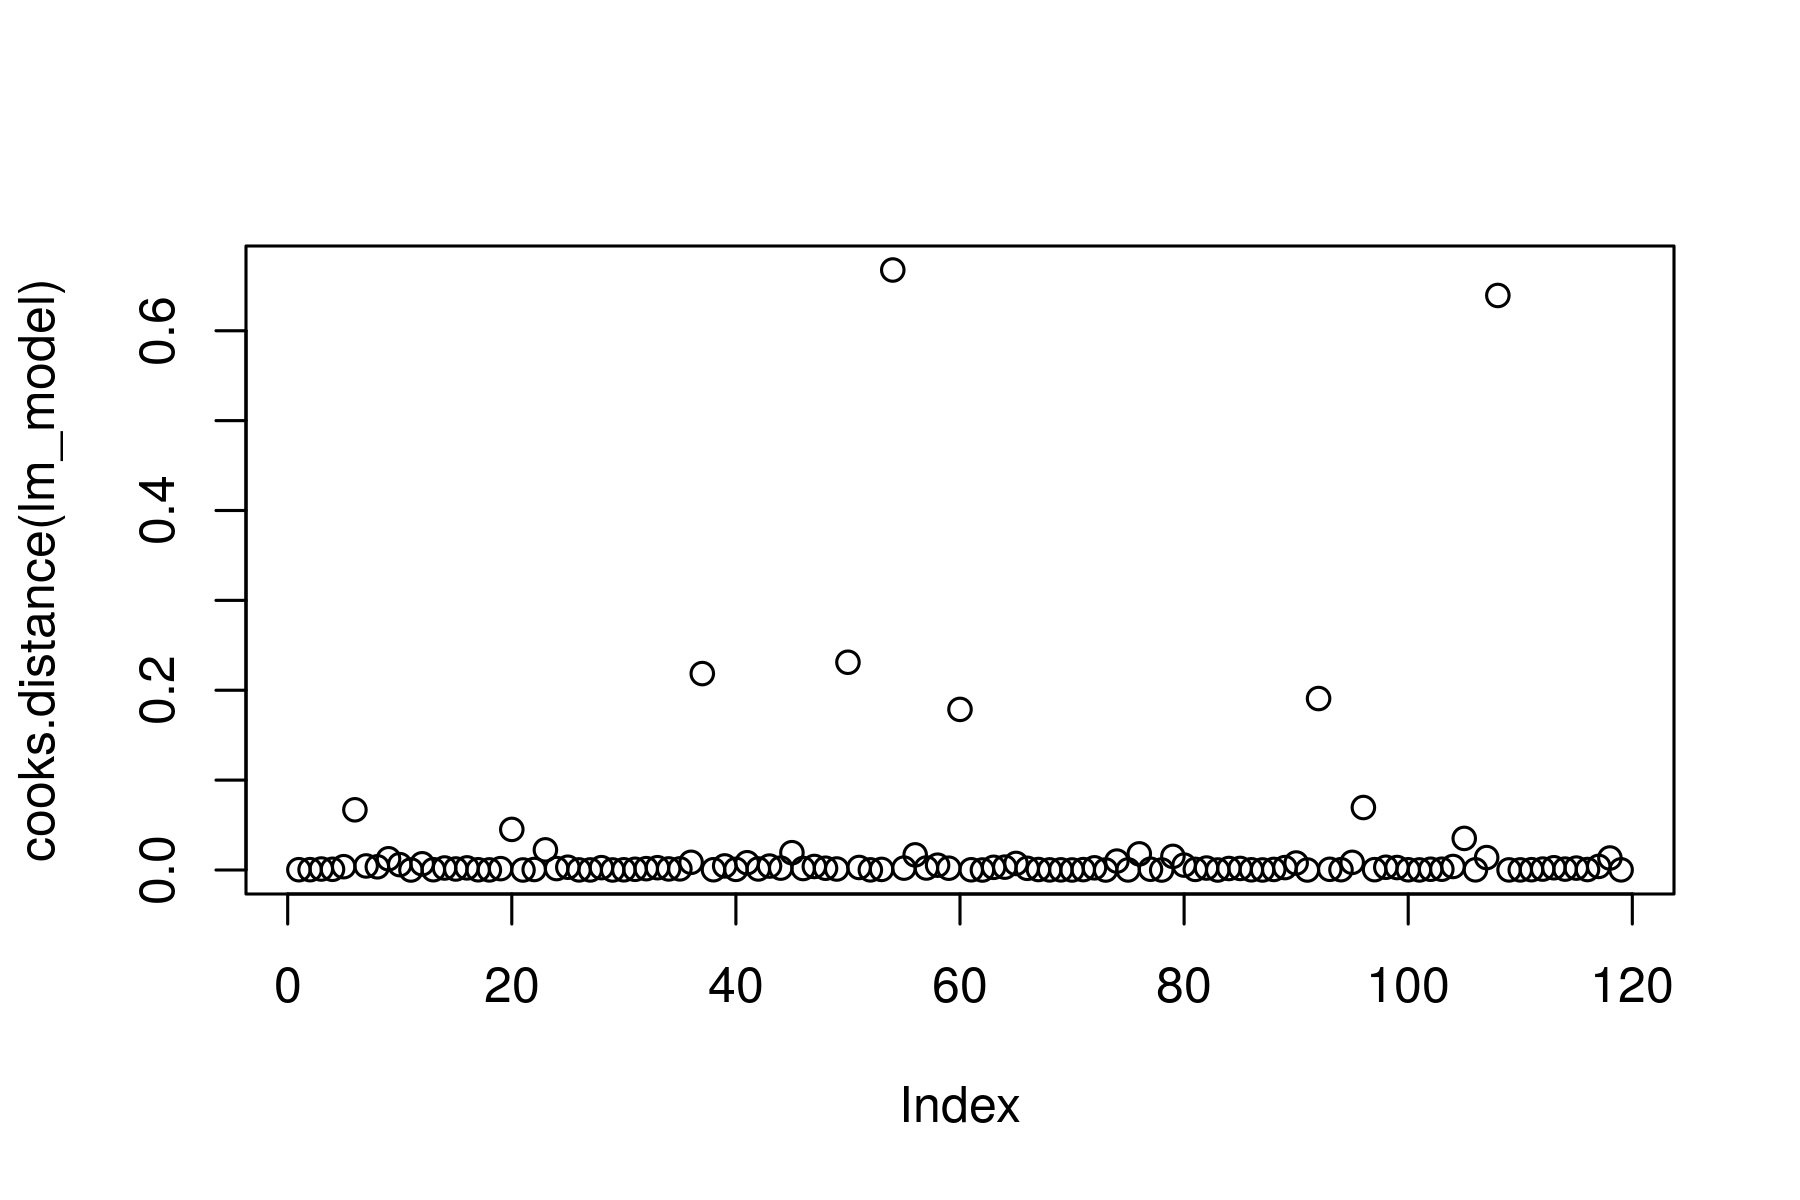

In [3420]:
plot(cooks.distance(lm_model))
as.data.frame(cooks.distance(lm_model), n=n)
       

In [3421]:
df_madrid_train$pred <- predict(lm_model, df_madrid_train)
summary(df_madrid_train$pred)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  27.61   47.01   60.48   68.59   83.13  171.84       2 

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

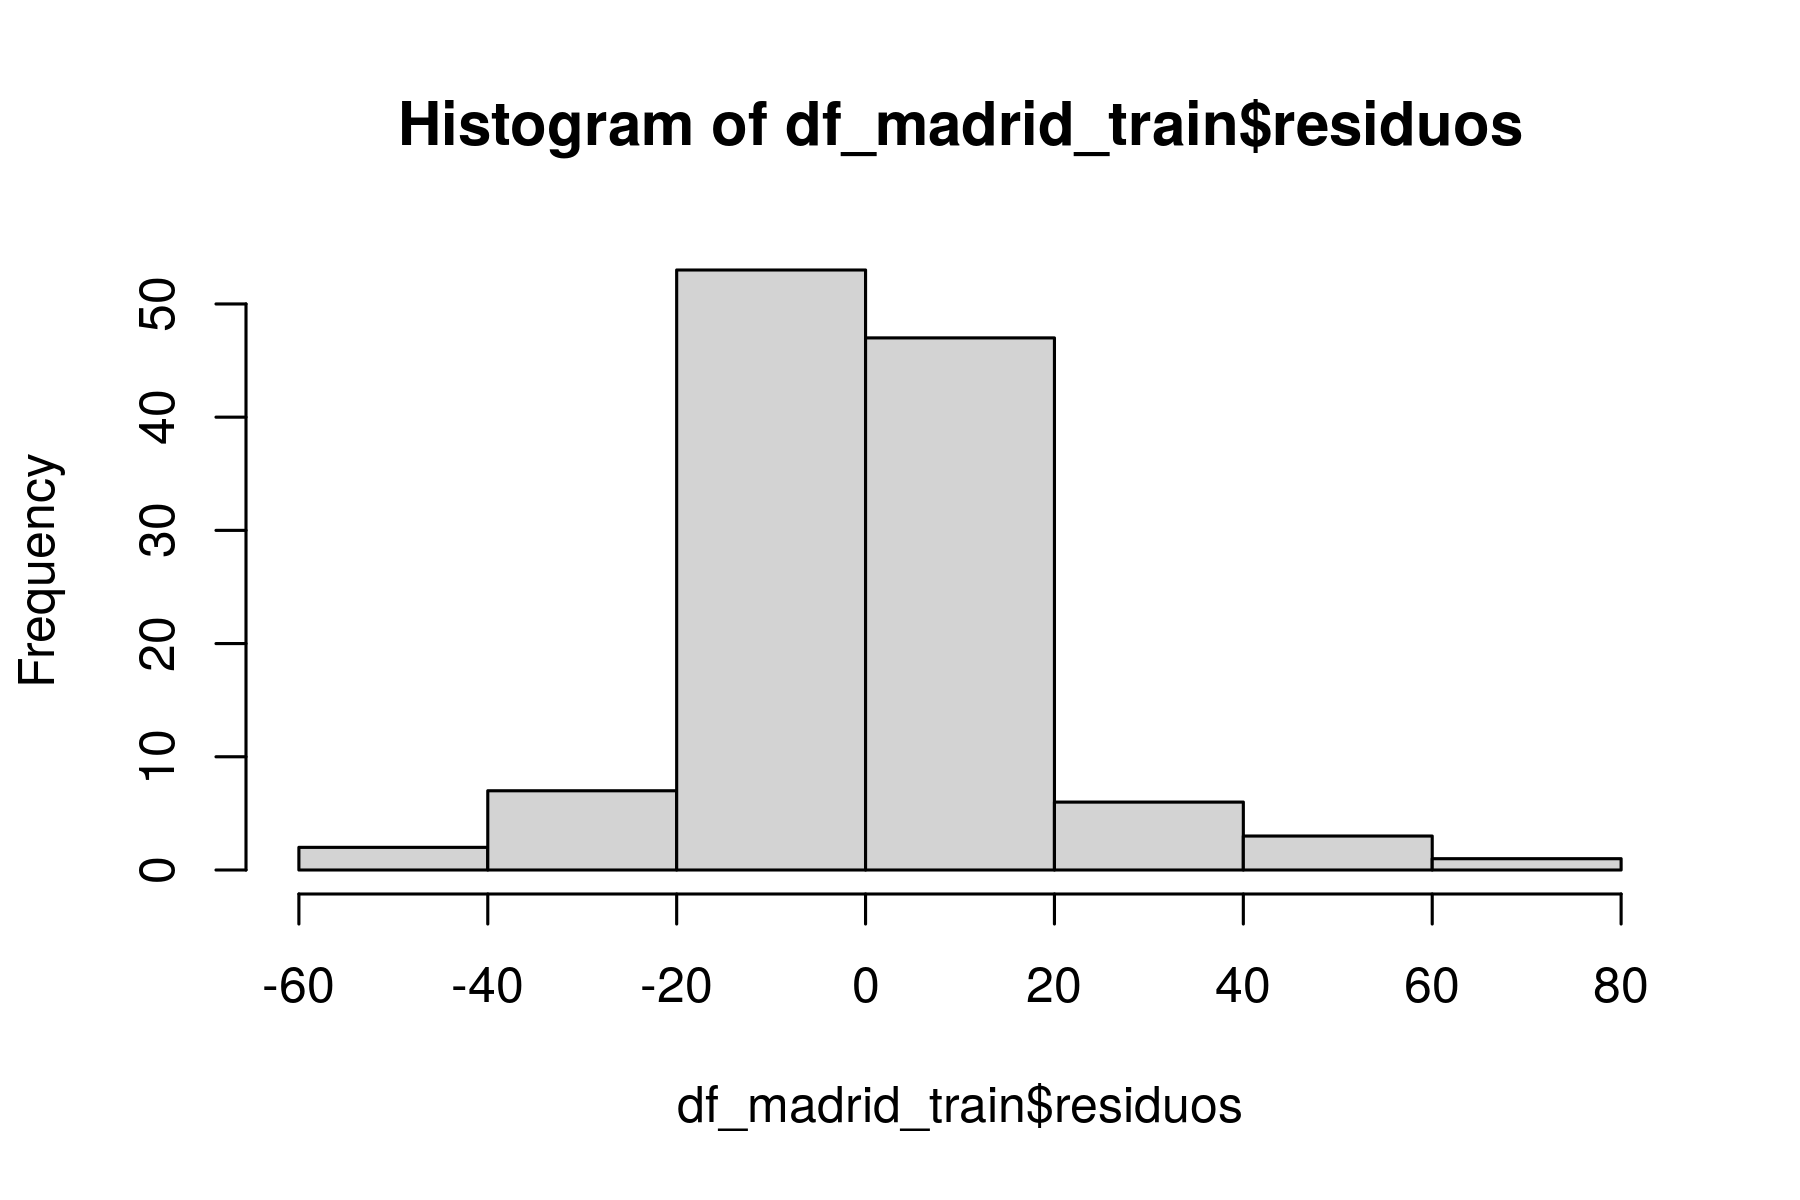

In [3422]:
df_madrid_train$residuos<-df_madrid_train$Square.Meters-df_madrid_train$pred
hist(df_madrid_train$residuos)

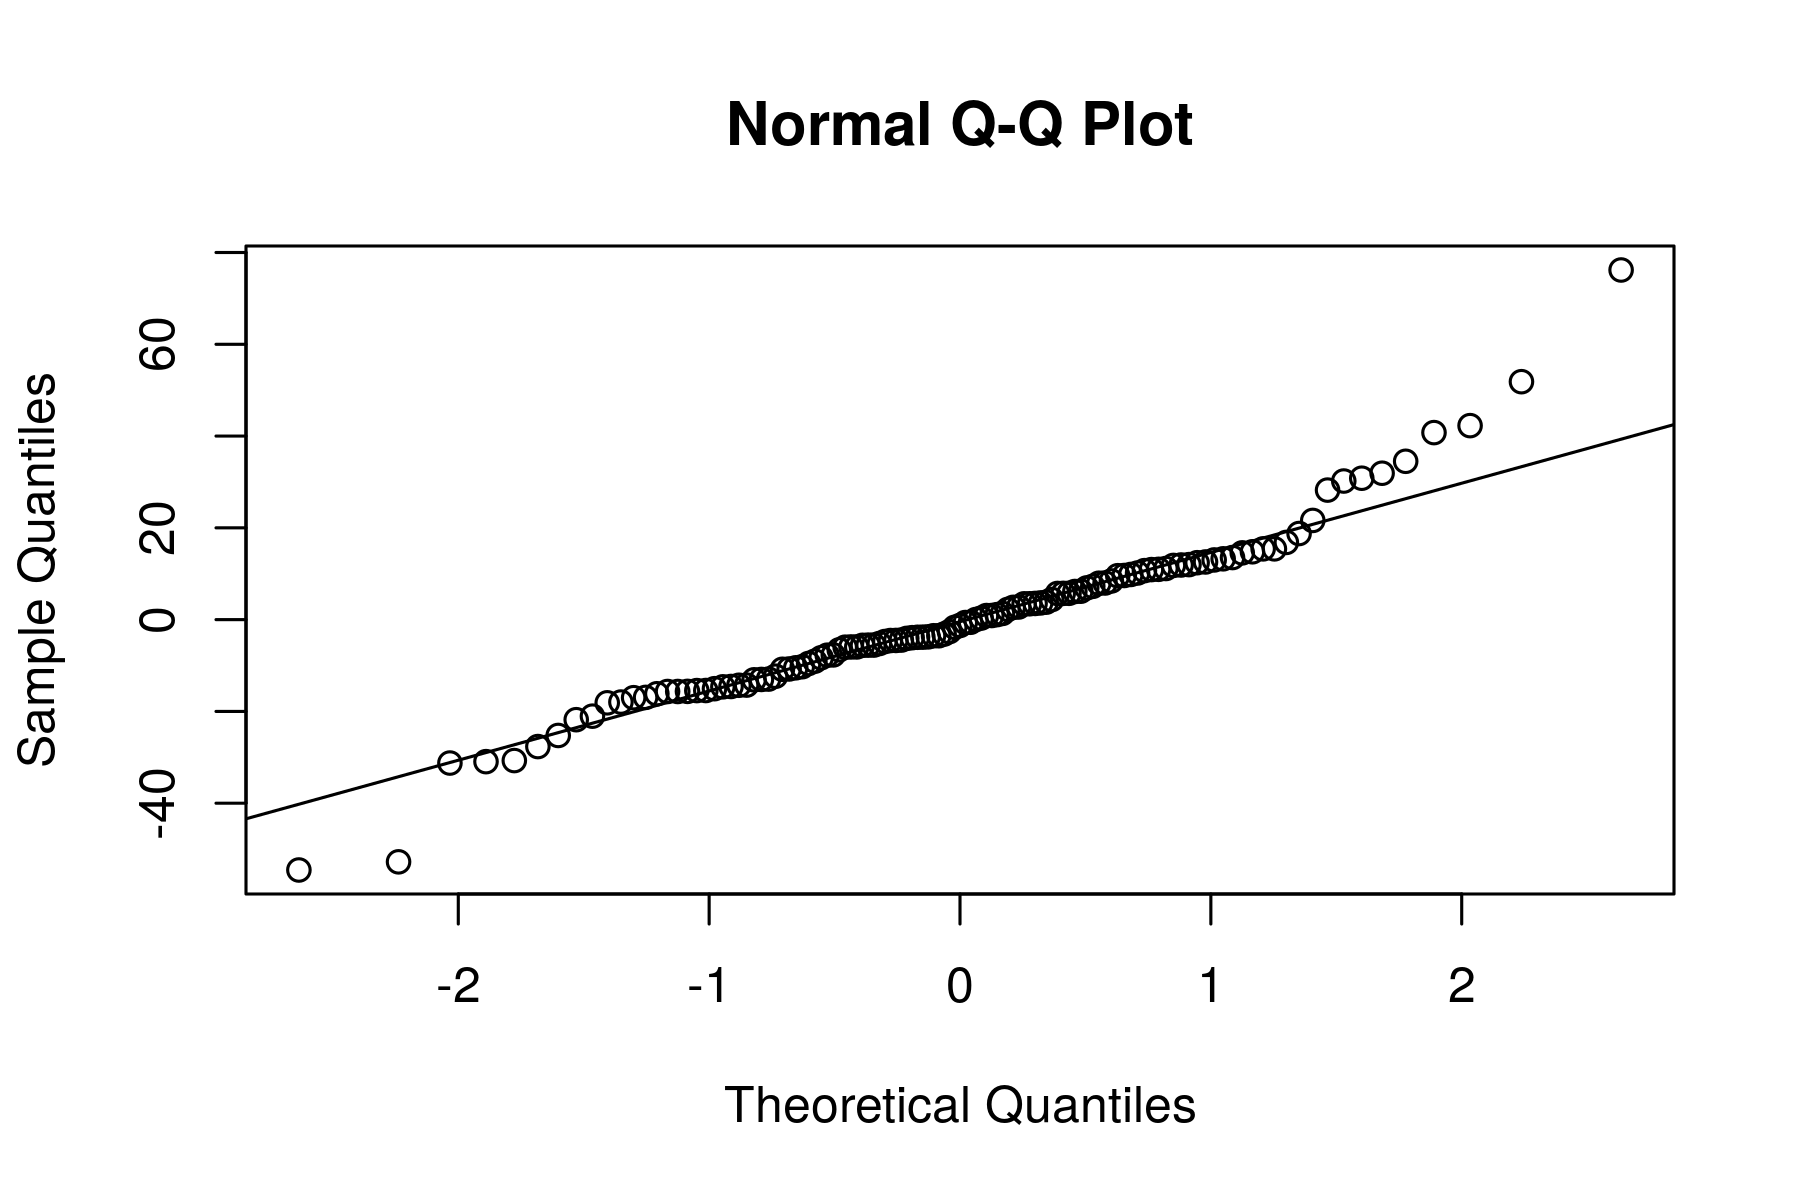

In [3423]:
qqnorm(lm_model$residuals)
qqline(lm_model$residuals)

Warning message:
“Removed 2 rows containing missing values (geom_point).”


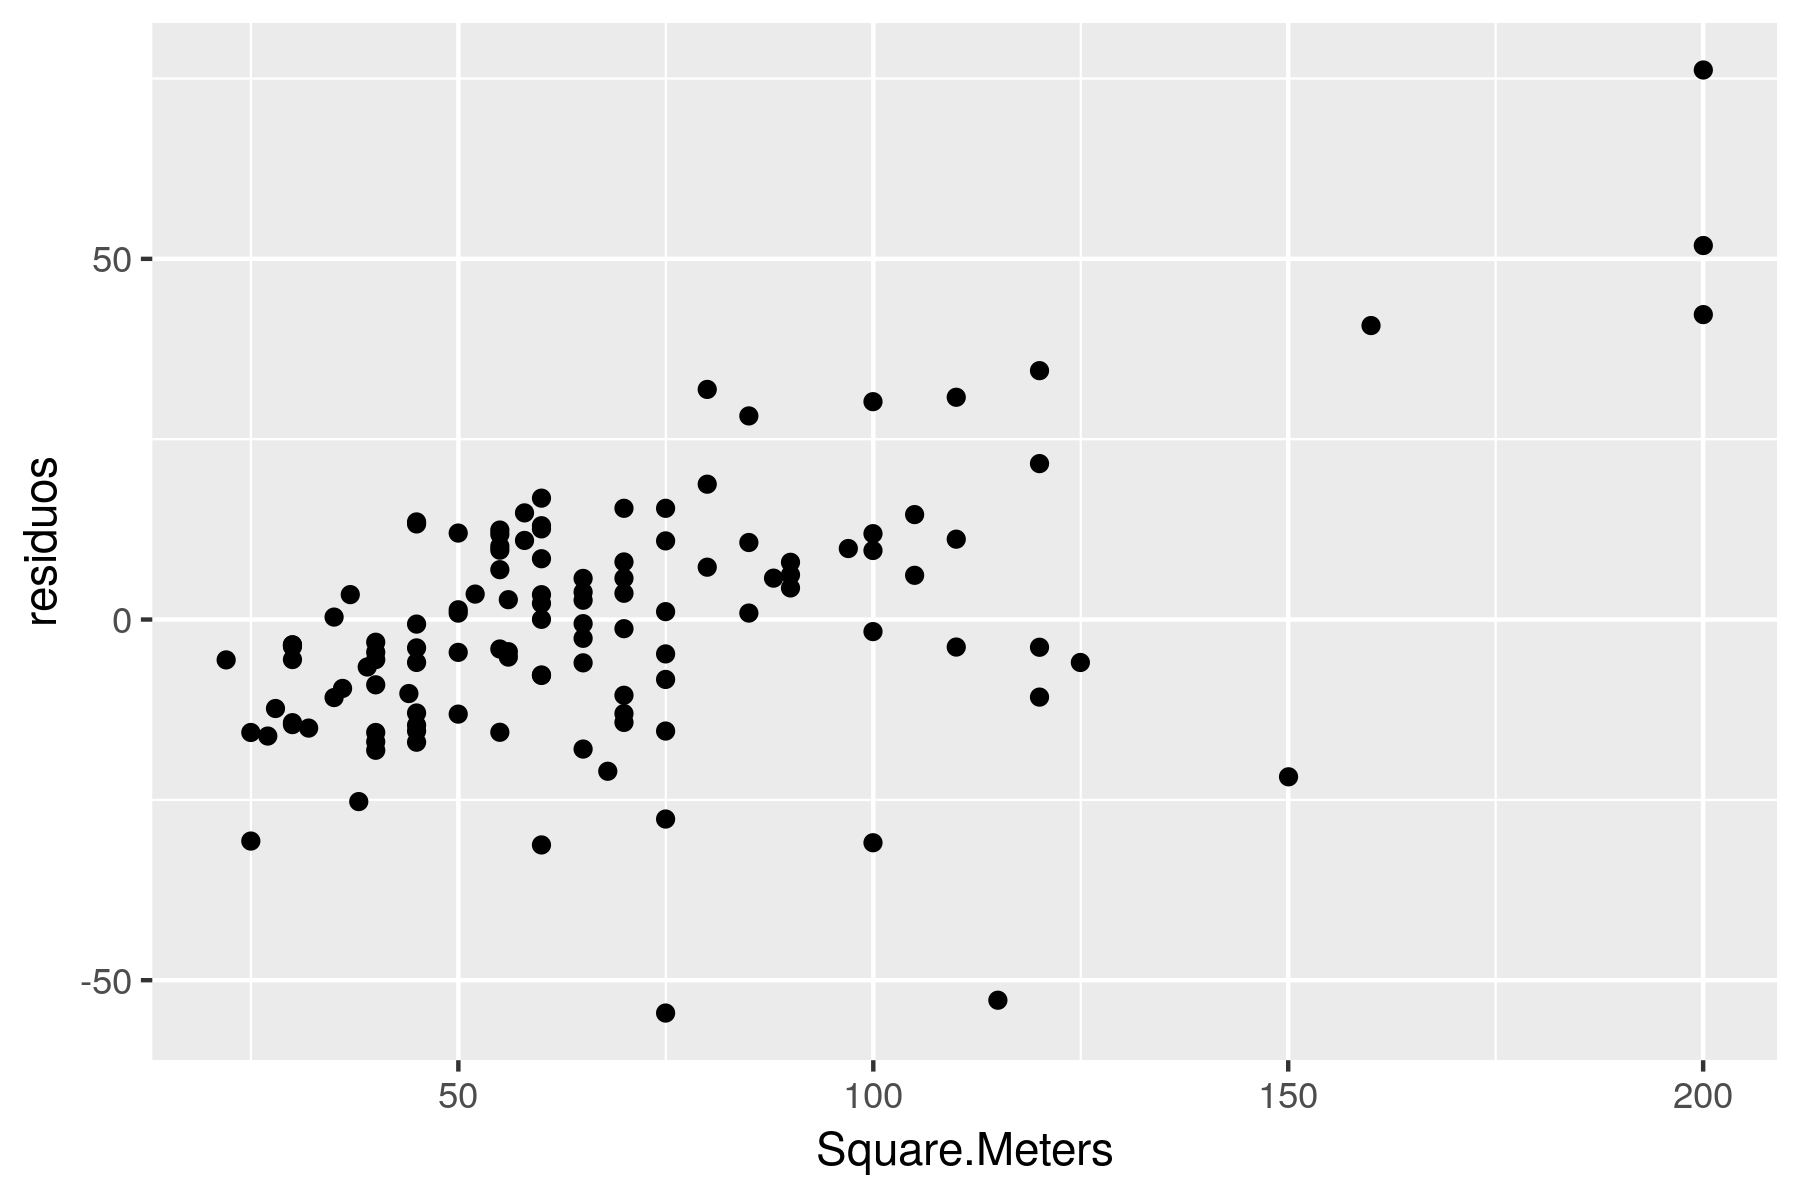

In [3424]:
ggplot(df_madrid_train, aes(y=residuos, x=Square.Meters))+geom_point()

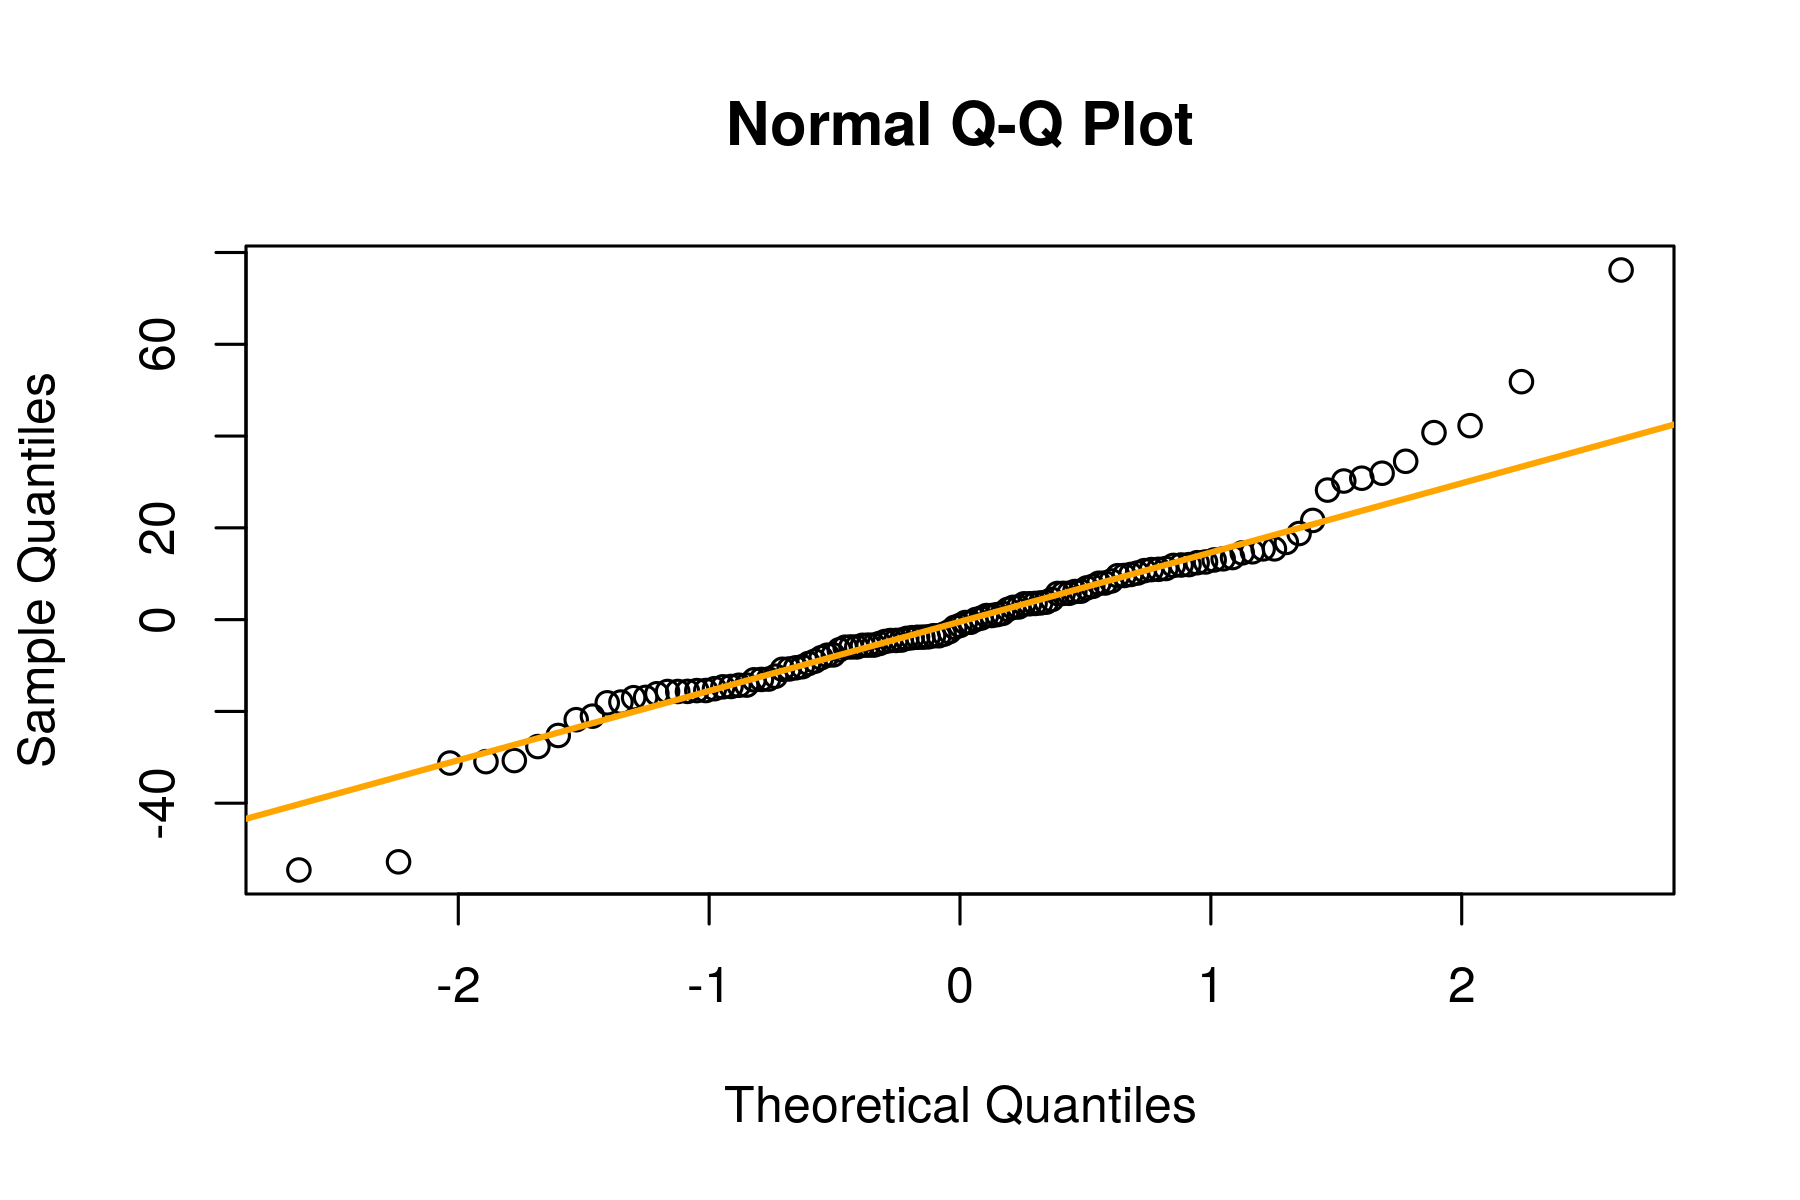

In [3425]:
qqnorm(df_madrid_train$Square.Meters-df_madrid_train$pred)
qqline(df_madrid_train$Square.Meters-df_madrid_train$pred, col="orange", lwd=2)

In [3426]:
res<-(df_madrid_train$Square.Meters-df_madrid_train$pred)
shapiro.test(res[sample(1:length(res),100)])


	Shapiro-Wilk normality test

data:  res[sample(1:length(res), 100)]
W = 0.96908, p-value = 0.01974


In [3427]:
caret::postResample(pred=df_madrid_train$pred, obs=df_madrid_train$Square.Meters)

RMSE   Rsquared        MAE 
17.9141889  0.7299876 12.9407688

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  29.33   44.83   56.03   63.92   76.27  175.75       2 

RMSE   Rsquared        MAE 
17.8249398  0.7118457 12.4997883

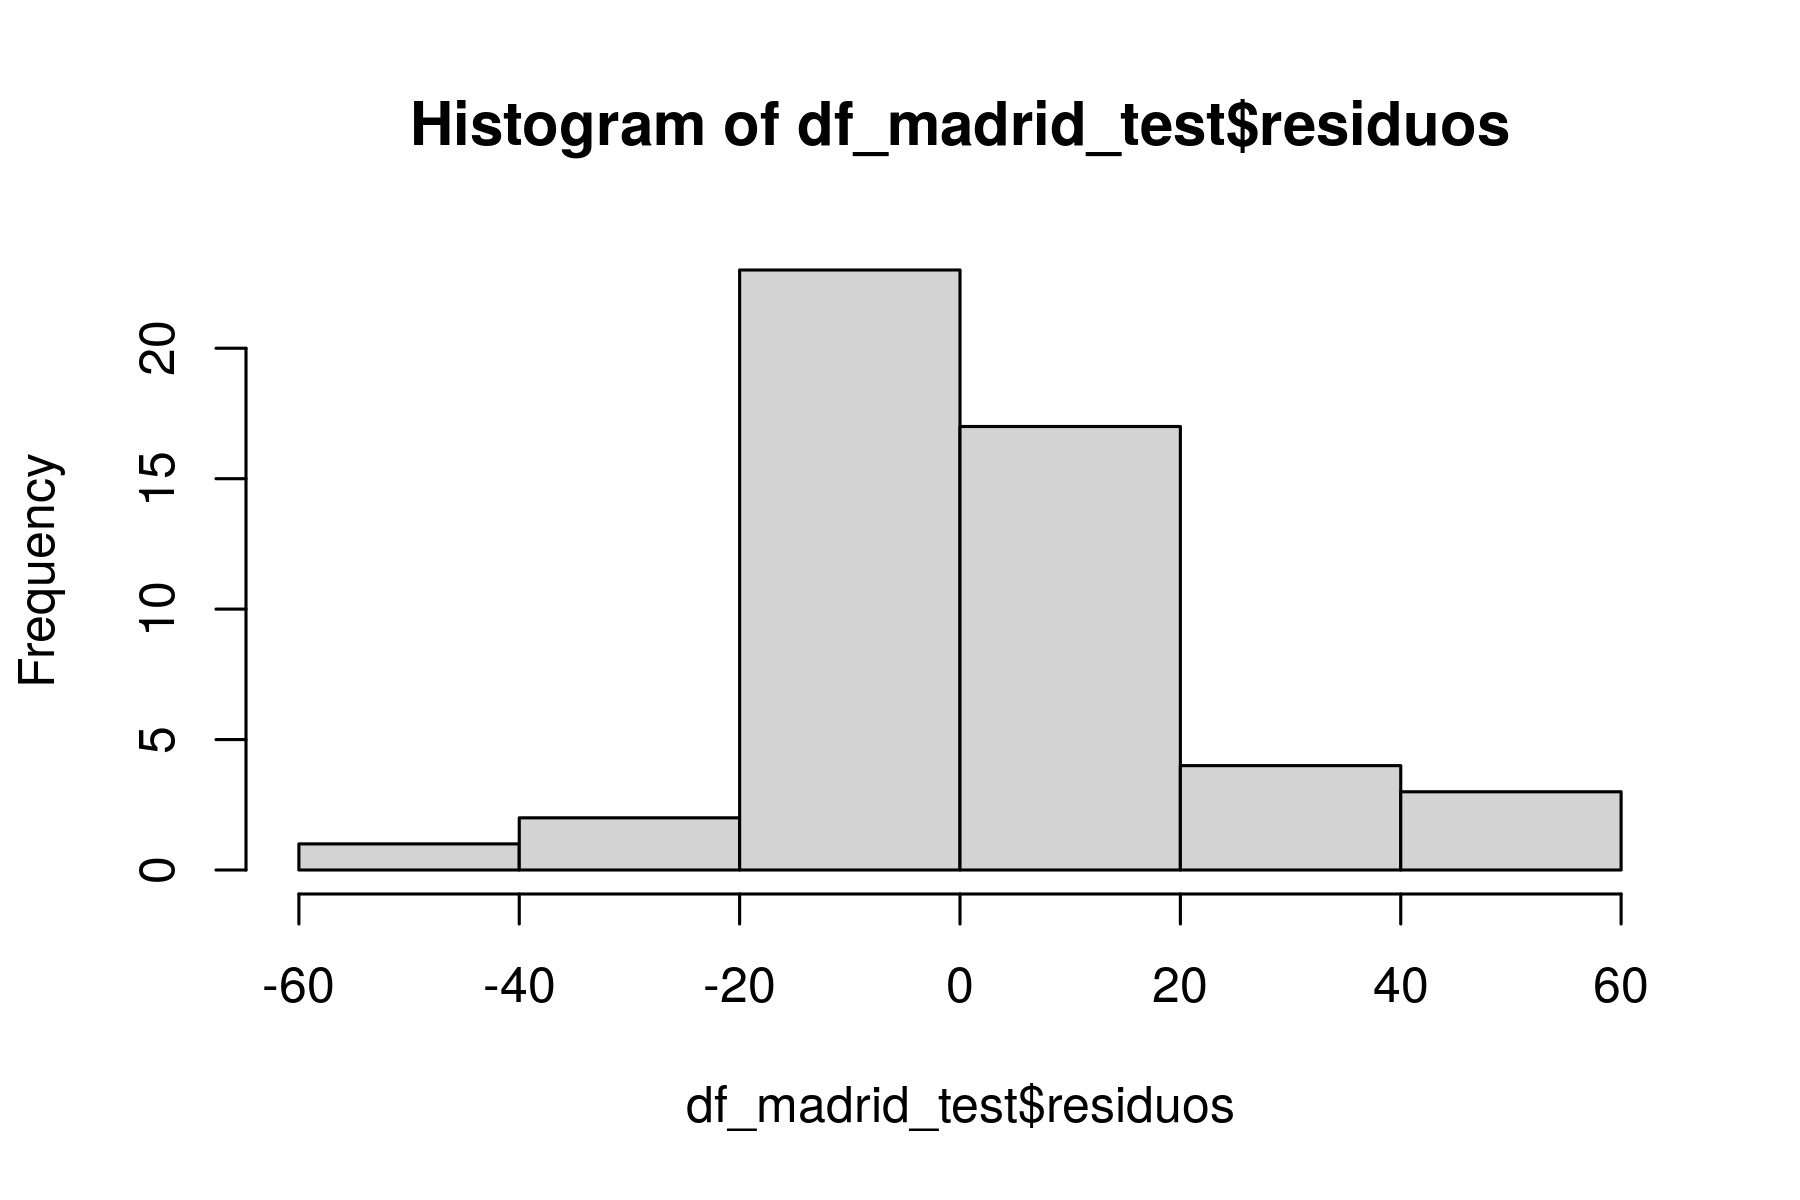

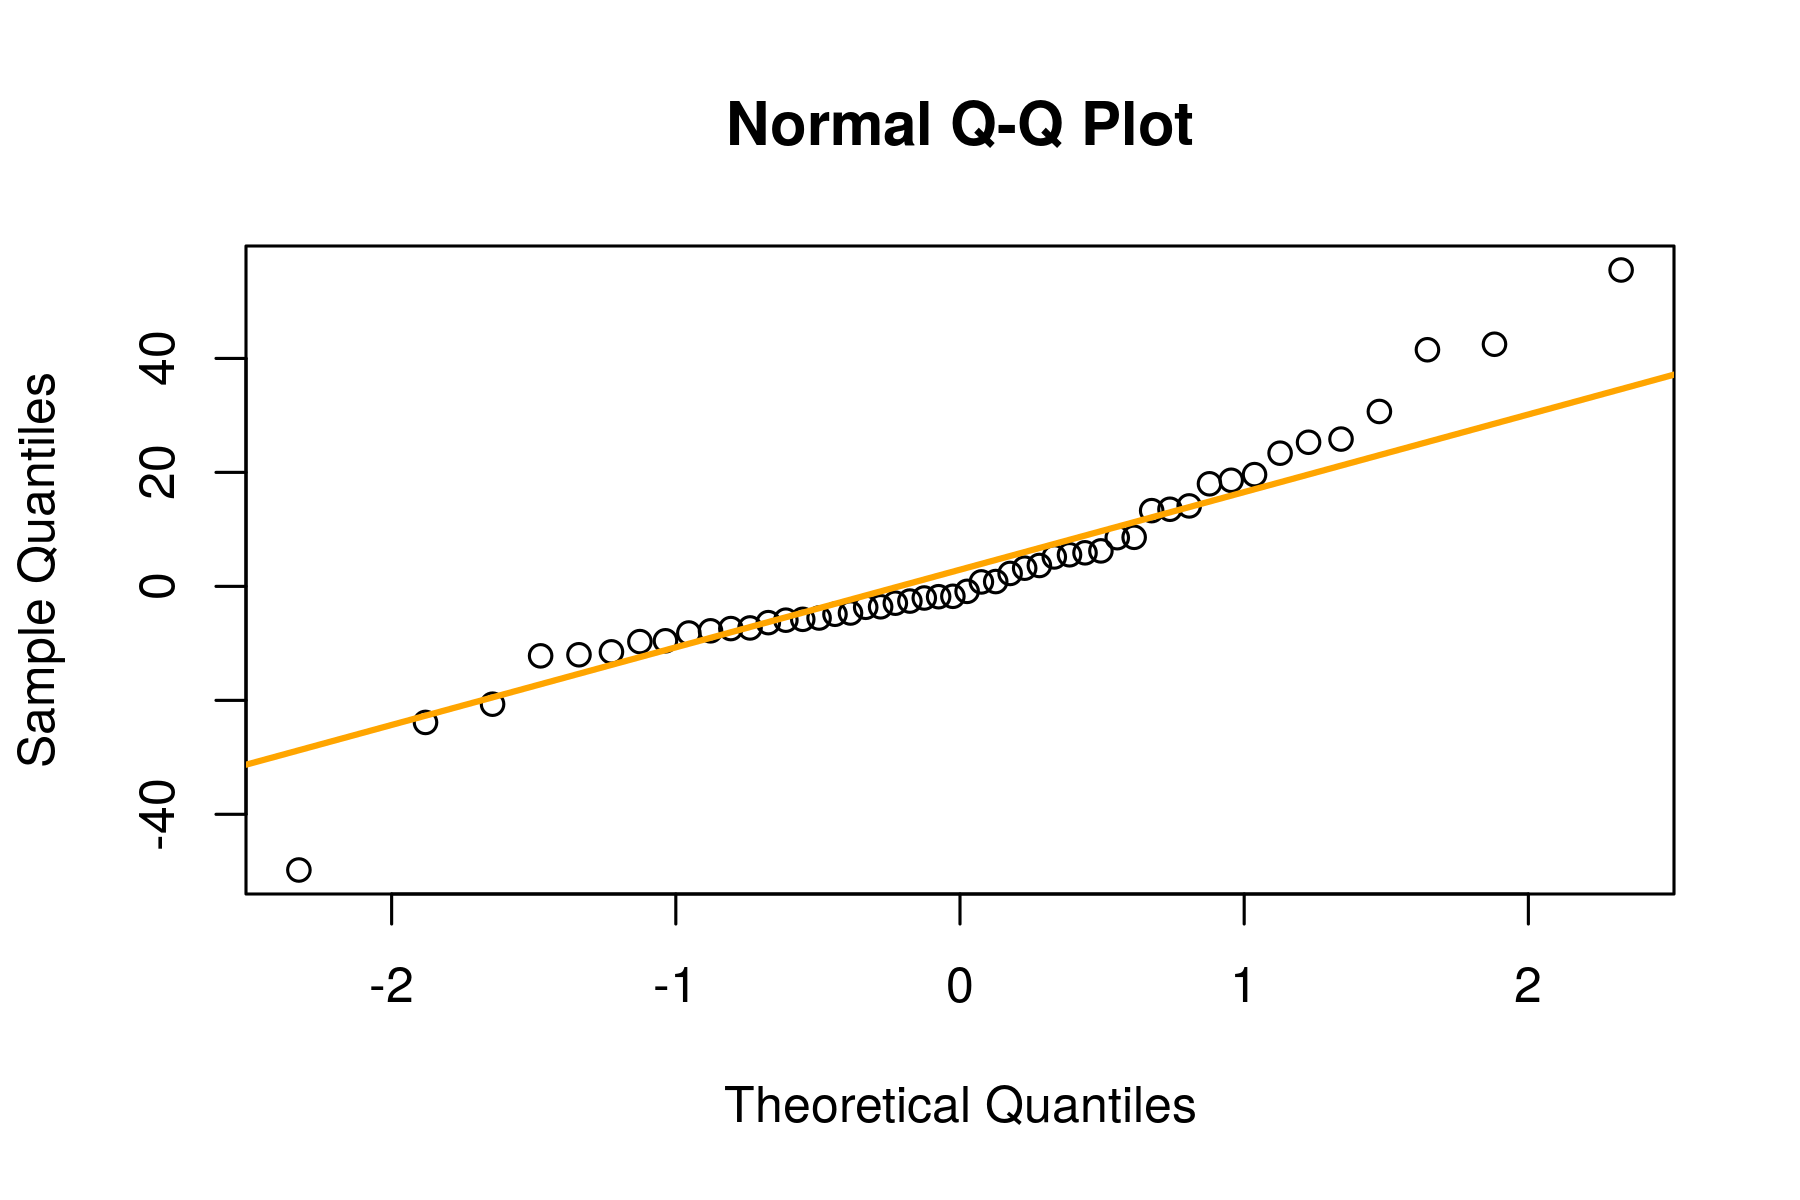

In [3428]:
df_madrid_test$pred<-predict(lm_model, df_madrid_test)
summary(df_madrid_test$pred)
caret::postResample(pred=df_madrid_test$pred, obs=df_madrid_test$Square.Meters)
df_madrid_test$residuos<-df_madrid_test$Square.Meters-df_madrid_test$pred
hist(df_madrid_test$residuos)
qqnorm(df_madrid_test$Square.Meters-df_madrid_test$pred)
qqline(df_madrid_test$Square.Meters-df_madrid_test$pred, col="orange", lwd=2)

In [3429]:
step(object = lm_model, direction = "both", trace = TRUE)

Start:  AIC=698.77
Square.Meters ~ Bathrooms + Bedrooms:neighb_id + log(Price)

                     Df Sum of Sq   RSS    AIC
<none>                            38189 698.77
- Bathrooms           1    1947.2 40136 702.69
- log(Price)          1    3962.2 42151 708.52
- Bedrooms:neighb_id  3   23602.0 61791 750.03



Call:
lm(formula = Square.Meters ~ Bathrooms + Bedrooms:neighb_id + 
    log(Price), data = df_madrid_train)

Coefficients:
        (Intercept)            Bathrooms           log(Price)  
             -35.91                 9.81                14.56  
Bedrooms:neighb_id1  Bedrooms:neighb_id2  Bedrooms:neighb_id3  
              21.02                12.32                19.37  


Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [3498]:
Accomodates<-c(6)
Bathrooms<-c(1)
Prices<-c(80)
Bedrooms<-c(3)
Beds<-c(3)
Neighbourhood<-c("Sol")
Review.Scores.Rating<-c(80)
neighb_id<-as.factor(neighb_id)

sol_predict<-data.frame(Neighbourhood, Accomodates,Bathrooms,Bedrooms,Beds,  Prices,Square.Feet=NA,Guests.Included=NA,Extra.People=NA,Review.Scores.Rating,Latitude=NA,Longitude=NA,neighb_id )
sol_predict
predi<-predict(lm_model, sol_predict)
predi
paste ("El anunció de un apartamento para 6 personas, con 1 baño,precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80 
        tendría" , predi ,"metros cuadrados ")

Neighbourhood,Accomodates,Bathrooms,Bedrooms,Beds,Prices,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,neighb_id
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<lgl>,<lgl>,<fct>
Sol,6,1,3,3,80,NA,NA,NA,80,NA,NA,2


1 
74.6768

[1] "El anunció de un apartamento para 6 personas, con 1 baño,precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80 \n        tendría 74.6767961041271 metros cuadrados "

In [3496]:
Accomodates<-c(6)
Bathrooms<-c(1)
Prices<-c(80)
Bedrooms<-c(3)
Beds<-c(3)
Neighbourhood<-c("Sol")
Review.Scores.Rating<-c(80)
neighb_id<-as.factor(neighb_id)

new_data<-data.frame(Neighbourhood, Accomodates,Bathrooms,Bedrooms,Beds,  
                     Prices,Square.Feet=NA,Guests.Included=NA,Extra.People=NA,Review.Scores.Rating,
                     Latitude=NA,Longitude=NA,Square.Meters=NA, neighb_id )
new_data
new_data$pred<-predict(lm_model, new_data)
paste ("El anunció de un apartamento para 6 personas, con 1 baño,precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80 
        tendría" , new_data$pred ,"metros cuadrados ")

Neighbourhood,Accomodates,Bathrooms,Bedrooms,Beds,Prices,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<fct>
Sol,6,1,3,3,80,NA,NA,NA,80,NA,NA,NA,2


[1] "El anunció de un apartamento para 6 personas, con 1 baño,precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80 \n        tendría 74.6767961041271 metros cuadrados "

In [3499]:
Accomodates<-c(6)
Bathrooms<-c(4)
Prices<-c(197)
Bedrooms<-c(4)
Beds<-c(1)
Neighbourhood<-c("Rio Rosas")
Review.Scores.Rating<-c(88)
neighb_id<-as.factor(neighb_id)

new_data<-data.frame(Neighbourhood, Accomodates,Bathrooms,Bedrooms,Beds,  Prices,Square.Feet=NA,Guests.Included=NA,Extra.People=NA,Review.Scores.Rating,Latitude=NA,Longitude=NA,Square.Meters=NA, neighb_id )
new_data
new_data$pred<-predict(lm_model, new_data)
paste ("el anunció tendría " , new_data$pred ,"metros cuadrados ")

Neighbourhood,Accomodates,Bathrooms,Bedrooms,Beds,Prices,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<fct>
Rio Rosas,6,4,4,1,197,NA,NA,NA,88,NA,NA,NA,2


[1] "el anunció tendría  116.428515624942 metros cuadrados "

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [3433]:
df_madrid_NA$neighb_id<-as.factor(cl[df_madrid_NA$Neighbourhood] )
df_madrid_N

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
El Tréntaiseis,4,2.0,2,3,140,NA,1,0,98,40.41188,-3.669571,NA,3
Jerónimos,2,1.0,1,1,65,NA,1,0,92,40.40813,-3.684410,NA,1
Jerónimos,4,1.0,1,4,130,NA,1,0,85,40.41321,-3.689552,NA,1
Jerónimos,5,2.0,2,2,100,NA,1,0,94,40.41463,-3.691347,NA,1
Fuente del Berro,6,2.0,3,6,80,NA,4,8,100,40.42585,-3.662694,NA,3
Almagro,4,1.0,0,1,59,NA,1,15,87,40.42981,-3.695291,NA,1
Almagro,3,1.0,1,2,105,NA,2,15,NA,40.43464,-3.690997,NA,1
Almagro,4,2.0,2,2,143,NA,2,15,NA,40.43414,-3.692237,NA,1
Rios Rosas,3,1.0,1,2,45,NA,1,0,91,40.44260,-3.697801,NA,3


In [3434]:
df_madrid_NA$Square.Meters[is.na(df_madrid_NA$Square.Meters)]<-predict(lm_model, df_madrid_NA)
df_madrid_NA

Warning message in df_madrid_NA$Square.Meters[is.na(df_madrid_NA$Square.Meters)] <- predict(lm_model, :
“number of items to replace is not a multiple of replacement length”


Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
El Tréntaiseis,4,2.0,2,3,140,NA,1,0,98,40.41188,-3.669571,94.40967,3
Jerónimos,2,1.0,1,1,65,NA,1,0,92,40.40813,-3.684410,55.70019,1
Jerónimos,4,1.0,1,4,130,NA,1,0,85,40.41321,-3.689552,65.79347,1
Jerónimos,5,2.0,2,2,100,NA,1,0,94,40.41463,-3.691347,92.79815,1
Fuente del Berro,6,2.0,3,6,80,NA,4,8,100,40.42585,-3.662694,105.63229,3
Almagro,4,1.0,0,1,59,NA,1,15,87,40.42981,-3.695291,33.27442,1
Almagro,3,1.0,1,2,105,NA,2,15,NA,40.43464,-3.690997,62.68350,1
Almagro,4,2.0,2,2,143,NA,2,15,NA,40.43414,-3.692237,98.00644,1
Rios Rosas,3,1.0,1,2,45,NA,1,0,91,40.44260,-3.697801,48.70154,3


In [3435]:
table(is.na(df_madrid_NA$Square.Meter))

Warning message:
“Unknown or uninitialised column: `Square.Meter`.”


< table of extent 0 >


Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [3483]:
pca_nci <- prcomp(na.omit(df_madrid_NA[,2:13]), center=TRUE, scale=TRUE)
pca_nci

Standard deviations (1, .., p=12):
 [1] 2.1319170 1.2183516 1.0783283 0.9582026 0.9188295 0.8113856 0.7804223
 [8] 0.7258254 0.6756176 0.6400187 0.5070378 0.3577135

Rotation (n x k) = (12 x 12):
                            PC1         PC2         PC3         PC4
Accommodates         0.40384599 -0.07930643  0.25410765  0.02295973
Bathrooms            0.36032496  0.15505116 -0.02104219 -0.14378576
Bedrooms             0.40241083 -0.05804825  0.04363403 -0.02233758
Beds                 0.38284457 -0.12782565  0.18902875  0.12722265
Price                0.31504769 -0.03288931 -0.15353945 -0.27549585
Square.Feet          0.30242039  0.08307909 -0.39807989 -0.13230811
Guests.Included      0.31287504  0.06313052  0.23156254  0.11415522
Extra.People         0.17466546 -0.32166878  0.17434306  0.59586972
Review.Scores.Rating 0.01355627 -0.17521180 -0.68143692  0.45791750
Latitude             0.04342754  0.67219488  0.04609693  0.01256644
Longitude            0.05757757  0.59231043 -0.02885666 

In [3484]:
names(pca_nci)
pca_nci$center

[1] "sdev"     "rotation" "center"   "scale"    "x"

Accommodates            Bathrooms             Bedrooms 
            4.334385             1.250789             1.482650 
                Beds                Price          Square.Feet 
            2.514196            88.331230           400.182965 
     Guests.Included         Extra.People Review.Scores.Rating 
            2.123028            10.457413            90.006309 
            Latitude            Longitude        Square.Meters 
           40.419893            -3.699269            64.160145

In [3495]:
Accomodates<-c(1)
Bathrooms<-c(3)
Price<-c(80)
Bedrooms<-c(1)
Beds<-c(2)
Review.Scores.Rating<-c(40)
Guests.Included<-c(2)
Extra.People<-c(0)
Latitude<-c(-3.669571)
Longitude <-c(40.41805)
Square.Feet<-(646)
Square.Meters<-c(60)


pca_prediccion<-data.frame(Accomodates,Bathrooms,Bedrooms,Beds,  
                     Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,
                     Latitude,Longitude,Square.Meters )

pca_prediccion

Accomodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,1,2,80,646,2,0,40,-3.669571,40.41805,60


In [3494]:
number_of_pca_components<-50

Apc<-pca_nci$x[,1:number_of_pca_components]
dist<-rep(NA,nrow(Apc))
for (i in 1:nrow(Apc)){
    dist[i]<-sum((pca_prediccion-Apc[i,])^2)
}
which.min(dist)

ERROR: Error in pca_nci$x[, 1:number_of_pca_components]: subscript out of bounds


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?